<a name="outline"></a>
# Predicting Visual Perception in Mice with Neuropixel Data

>   The goal of this project is to predict the visual stimulus presented to mice based on the firing network of the synapses between their neurons. We utilize data from the Ecephys Project, which employs Neuropixel technology to record large-scale neural activity. The neural activity, called action potentials, is the a electrical signal generated by the movement of charged ions across the membrane of a neuron. Each unique action potential can also be referred to as a unit. The following analysis includes creating a binned binary spike train dataset from the spike trains given by the Allen Institute, visualizing useful information, and applying deep learning as well as machine learning techniques for image prediction.

</div>
<img src="pictures/Hyper Parameter Tuning.png" width="500" height="800" alt="Alt text"/>
</div>

*** Setup the environment. ***

In [1]:
# Setup Environment
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import psutil
import time
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVR
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
import torch
import pickle
#from torch_geometric.data import Data
#from torch_geometric.nn import GCNConv, GATConv, GATv2Conv
from torch.nn import Linear
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import concurrent.futures
from concurrent.futures import ProcessPoolExecutor
import time
from data_processors.pull_and_process_data import master_function

if torch.cuda.is_available():
    print("CUDA GPU is available.")
    device = torch.device('cuda')
else:
    print("CUDA GPU is not available. Using CPU instead.")
    device = torch.device('cpu')
    
print(f"Current GPU device: {torch.cuda.get_device_name(torch.cuda.current_device())}")
print(f"Total RAM: {(psutil.virtual_memory().total / (1024**3)):.2f} GB")
print(f"Available RAM: {(psutil.virtual_memory().available / (1024**3)):.2f} GB")

C:\Users\Ray\anaconda3\envs\pytorch_cuda118\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
CUDA GPU is available.
Current GPU device: NVIDIA GeForce RTX 4070 Ti
Total RAM: 63.79 GB
Available RAM: 51.52 GB


In [2]:
!pip install pandas


## ***Index***

<a name="step1"></a>
### 1. Pull, Process, or Load Pre-Processed Data

    Pull data from the Ecephys repository, process it, then save it to a pickle file.
    If the data has already been processed, it will load from a saved directory.

- 1.1) Get non-normalized firing rates.
- 1.2) Get normalized firing rates.

[Go to Step 1](#step1content)

<a name="step2"></a>
### 2. Visualize the Data

    Here we will run visualizations to explore the information relevant to predicting visual perception with the data.

- 2.0) Pull image data from the Allen SDK Package.
- 2.1) All natural scenes presented by their frame number.
- 2.2) Visualize the unique firing pattern of different single units (usually a single neuron).
- 2.3) Raster plot of the spike trains for single units over the course of the natural scene testing.
- 2.4) Sorted correlation matrix between single units.
- 2.5) Grouped heat maps of unit responses by frames.
- 2.6) Average firing rates of units during each frame, in Hertz and by Z scores.

[Go to Step 2](#step2content)

<a name="step3"></a>
### 3. Image Prediction Modeling
    
    The purpose of this section is to...
    1. Employ various machine learning and deep learning techniques to predict the visual stimulus given the data.
    2. Produce directed adjacency matrices using a Spatio-Temporal Graph Neural Network. These adjacency matrices may represent the directed functional connectomics between units, usually single neurons, during each frame.
    3. Visualize the network of single units over time.
    
- 3.0) Create train splits, test splits.
- 3.1) Baseline Model: a random guess with an accuracy of 0.85% (1/118).
- 3.2) Support Vector Machine with Radial Basis Function.
- 3.3) Principal Component Regression.
- 3.4) Multi-Class Regression with L2 Regularizaiton.
- 3.5) Neural Network with one hidden layer.
- 3.6) Neural Network with multiple hidden layers.
- 3.7) Graph Convolution Network(GCN).
- 3.8) Graph Attention Network(GAT).
- 3.9) Long Short-Term Memory(LSTM).
- 3.10) Spatio-Temporal Graph Attention Network(ST-GAT).
- 3.11) Transformer.

[Go to Step 3](#step3content)


## References
[Go to References](#references)

<a name="step1content"></a>
## 1. Pull, Process, or Load Pre-Processed Data
[Go to Outline](#outline)

#### Get non-normalized firing rates.

In [ ]:
# Load packages needed for step 1.
!pip install --upgrade allensdk
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache 
import warnings
warnings.filterwarnings("ignore", message="Ignoring cached namespace")

## 1. Pull and Process Data 
import time
from data_processors.pull_and_process_data import master_function

mouse_number = 715093703      

spike_df = master_function(session_number=mouse_number, output_dir="output", timesteps_per_frame=3)

In [6]:
[715093703, 719161530, 721123822, 732592105, 737581020, 739448407, 742951821, 743475441, 744228101, 746083955, 750332458, 750749662, 751348571, 754312389, 754829445, 755434585, 756029989, 757216464, 757970808, 758798717, 759883607, 760345702, 760693773, 761418226, 762120172, 762602078, 763673393, 766640955, 767871931, 768515987, 771160300, 771990200, 773418906, 774875821, 778240327, 778998620, 779839471, 781842082, 786091066, 787025148, 789848216, 791319847, 793224716, 794812542, 797828357, 798911424, 799864342, 816200189, 819186360, 819701982, 821695405, 829720705, 831882777, 835479236, 839068429, 839557629, 840012044, 847657808]

[715093703,
 719161530,
 721123822,
 732592105,
 737581020,
 739448407,
 742951821,
 743475441,
 744228101,
 746083955,
 750332458,
 750749662,
 751348571,
 754312389,
 754829445,
 755434585,
 756029989,
 757216464,
 757970808,
 758798717,
 759883607,
 760345702,
 760693773,
 761418226,
 762120172,
 762602078,
 763673393,
 766640955,
 767871931,
 768515987,
 771160300,
 771990200,
 773418906,
 774875821,
 778240327,
 778998620,
 779839471,
 781842082,
 786091066,
 787025148,
 789848216,
 791319847,
 793224716,
 794812542,
 797828357,
 798911424,
 799864342,
 816200189,
 819186360,
 819701982,
 821695405,
 829720705,
 831882777,
 835479236,
 839068429,
 839557629,
 840012044,
 847657808]

#### Get normalized firing rates.

In [18]:
## 0. Load Pre-Processed Data 
from data_processors.load_processed_data import master_cleaning_and_saving

master_cleaning_and_saving(session_id= mouse_number, original_pickle_prefix = 'normalized_firing_rates')
normalized_firing_rates

Original data file for session 715093703 does not exist in 'output' directory.


UnboundLocalError: local variable 'filtered_normalized_firing_rates' referenced before assignment

<a name="step2content"></a>
## 2. Visualize the Data
[Go to Outline](#outline)

Here we visualize different aspects of the data spike train data.

- 2.0) Pull image data from the Allen SDK Package.
- 2.1) All natural scenes presented by their frame number.
- 2.2) Visualize the unique firing pattern of different single units (usually a single neuron).
- 2.3) Raster plot of the spike trains for single units over the course of the natural scene testing.
- 2.4) Sorted correlation matrix between single units.
- 2.5) Grouped heat maps of unit responses by frames.
  - 2.5.1) Heat maps of unit responses by all frames.
  - 2.5.2) Heat maps of unit responses by select number of frames.
- 2.6) Average firing rates of units during each frame, in Hertz and by Z scores.
  - 2.6.1) Average firing rates of chosen number of units during each frame, in Hertz.
  - 2.6.2) Average firing rates of all units during each frame, in Hertz.
  - 2.6.3) Average firing rates of all normalized units during each frame, in Hertz.
  - 2.6.4) Average firing rates of chosen normalized units during each frame, in Hertz.


### 2.0) Pull image data from the Allen SDK Package.

*** To set up the environment for visualizations. *** \
1st, run 2.0.1. \
2nd, run 2.0.2 if one hasn't already calculated the average firing rate per frame. If they haven't been calculated, run 2.0.3 to load them in.

#### 2.0.1) Run Cell to set up environment for visualizations.

In [12]:
# Load packages needed for step 1.
#!pip install -q allensdk

from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

# Define Carolina blue color (in RGB format)
carolina_blue = (86/255, 160/255, 211/255)

# Set output directory to a new folder called 'output' in the current working directory
output_dir = os.path.join(os.getcwd(), 'output')

# Check if the output directory exists, and create it if it doesn't
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Set DOWNLOAD_COMPLETE_DATASET to True
DOWNLOAD_COMPLETE_DATASET = True

# Create a file path to the manifest.json file within the output directory
manifest_path = os.path.join(output_dir, "manifest.json")

# Check if the manifest.json file exists
if os.path.exists(manifest_path):
    print("Using existing manifest.json file.")
else:
    print("Creating a new manifest.json file.")

# Create an instance of the EcephysProjectCache class with the manifest file path as argument
cache = EcephysProjectCache(manifest=manifest_path)
# Get session table
session_table = cache.get_session_table()

'''
 Pick session number
 '''
 
session_number = 721123822

# Pull session.
session = cache.get_session_data(session_number,
                                 isi_violations_maximum = np.inf,
                                 amplitude_cutoff_maximum = np.inf,
                                 presence_ratio_minimum = -np.inf
                                )
# Get spike times.
spike_times = session.spike_times
# Get specific stimulus table.
stimulus_table = session.get_stimulus_table("natural_scenes")

# Display objects within session.
print("Session objects")
print([attr_or_method for attr_or_method in dir(session) if attr_or_method[0] != '_'])

Using existing manifest.json file.


/nas/longleaf/home/rayrayc/.local/lib/python3.10/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:1371: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could "


Session objects
['DETAILED_STIMULUS_PARAMETERS', 'LazyProperty', 'age_in_days', 'api', 'channel_structure_intervals', 'channels', 'conditionwise_spike_statistics', 'ecephys_session_id', 'from_nwb_path', 'full_genotype', 'get_current_source_density', 'get_inter_presentation_intervals_for_stimulus', 'get_invalid_times', 'get_lfp', 'get_parameter_values_for_stimulus', 'get_pupil_data', 'get_screen_gaze_data', 'get_stimulus_epochs', 'get_stimulus_parameter_values', 'get_stimulus_table', 'inter_presentation_intervals', 'invalid_times', 'mean_waveforms', 'metadata', 'num_channels', 'num_probes', 'num_stimulus_presentations', 'num_units', 'optogenetic_stimulation_epochs', 'presentationwise_spike_counts', 'presentationwise_spike_times', 'probes', 'rig_equipment_name', 'rig_geometry_data', 'running_speed', 'session_start_time', 'session_type', 'sex', 'specimen_name', 'spike_amplitudes', 'spike_times', 'stimulus_conditions', 'stimulus_names', 'stimulus_presentations', 'structure_acronyms', 'stru

#### 2.0.2) Calulate the firing rates per frame, average firing rate per image, and average firing rate per second.

Calculate the average firing rate per frame. 

In [12]:
# Parameters
timesteps_per_frame = 1  # Set the number of timesteps per frame

# Stimulus table.
stimulus_table = session.get_stimulus_table("natural_scenes")

# The start times of each stimulus presentation
image_start_times = torch.tensor(stimulus_table.start_time.values)

# The end times of each stimulus presentation
image_end_times = torch.tensor(stimulus_table.stop_time.values)

# The duration of each image presentation
image_durations = image_end_times - image_start_times

# The bin size for each image presentation
bin_sizes = image_durations / timesteps_per_frame

# The number of bins per image presentation
bins_per_image = timesteps_per_frame

# The total number of bins
total_bins = bins_per_image * len(image_start_times)

# Create an empty binary spike matrix
num_neurons = len(spike_times.keys())

def process_neuron(times):
    # The start bin for the next image presentation
    start_bin = 0
    neuron_spike_bins = torch.zeros(total_bins, dtype=torch.int32)
    for image_idx, (start_time, end_time) in enumerate(zip(image_start_times, image_end_times)):
        # Bin edges for this image presentation
        bin_edges = torch.linspace(start_time, end_time, bins_per_image + 1)

        # Bin the spike times for this image presentation
        binned_spike_times = torch.histc(torch.tensor(times), bins=bin_edges.shape[0]-1, min=bin_edges.min(), max=bin_edges.max())

        # Add the binned spike times to the spike matrix
        end_bin = start_bin + bins_per_image
        if len(binned_spike_times) == len(neuron_spike_bins[start_bin:end_bin]):
            neuron_spike_bins[start_bin:end_bin] = binned_spike_times

        # Update the start bin for the next image presentation
        start_bin = end_bin
    return neuron_spike_bins

with concurrent.futures.ProcessPoolExecutor() as executor:
    spike_matrix = list(tqdm(executor.map(process_neuron, spike_times.values()), total=num_neurons, desc='Processing neurons'))

spike_matrix = torch.stack(spike_matrix)

# Convert the spike matrix to a pandas DataFrame and set the index to neuron IDs
spike_dataframe = pd.DataFrame(spike_matrix.numpy(), index=spike_times.keys())

spikes_per_frame = spike_dataframe.T
spikes_per_frame['frame'] = 'nan'
spikes_per_frame['frame'] = np.array(stimulus_table['frame'])
spikes_per_frame

Processing neurons: 100%|██████████| 1191/1191 [03:00<00:00,  6.61it/s]


950907203  950907205  950907518  950907524  950907209  950907207  \
0             0          6          0          0          0          0   
1             1          1          0          0          0          0   
2             0          2          0          0          0          0   
3             1          2          0          1          0          0   
4             1          3          0          1          0          0   
...         ...        ...        ...        ...        ...        ...   
5945          1          4          0          0          0          0   
5946          2          2          0          1          0          0   
5947          1          4          0          1          0          0   
5948          1          6          0          0          0          0   
5949          1          5          0          0          0          0   

      950907528  950907526  950907214  950907216  ...  950913428  950913495  \
0             0          2          2          0  ...          0          2   
1             0          0          2          0  ...          0          3   
2             0          1          3          0  ...          0          1   
3             0          2          7          0  ...          0          0   
4             0          2          3          2  ...          1          1   
...         ...        ...        ...        ...  ...        ...        ...   
5945          0          0          3          1  ...          0          4   
5946          0          0          2          0  ...          0          2   
5947          0          0          3          2  ...          0          2   
5948          0          0          4          4  ...          0          0   
5949          0          0          2          0  ...          0          1   

      950913484  950913475  950913466  950913839  950913553  950913542  \
0             0          2          0          0          2          0   
1             0          0          0          0          6          0   
2             0          0          0          0          5          0   
3             0          1          1          0          5          2   
4             1          1          0          0          1          0   
...         ...        ...        ...        ...        ...        ...   
5945          0          0          3          0          3          0   
5946          0          0          0          0          4          0   
5947          0          1          0          0          6          0   
5948          1          1          0          0          2          0   
5949          0          2          0          0          9          0   

      950913529  frame  
0             0   92.0  
1             0  114.0  
2             0  114.0  
3             0    0.0  
4             0   37.0  
...         ...    ...  
5945          0   15.0  
5946          0   46.0  
5947          0   86.0  
5948          1  110.0  
5949          0   17.0  

[5950 rows x 1192 columns]

Calculate spikes per image by taking the average of the spikes_per_frame calculation.

In [13]:
spikes_per_image = spikes_per_frame.groupby('frame').mean().iloc[1:,1:]
spikes_per_image.reset_index(inplace=True)
spikes_per_image

frame  950907205  950907518  950907524  950907209  950907207  950907528  \
0      0.0       3.66       0.04       0.46       0.02        0.0        0.0   
1      1.0       3.70       0.02       0.32       0.00        0.0        0.0   
2      2.0       3.38       0.00       0.42       0.00        0.0        0.0   
3      3.0       3.74       0.02       0.46       0.02        0.0        0.0   
4      4.0       3.68       0.00       0.42       0.00        0.0        0.0   
..     ...        ...        ...        ...        ...        ...        ...   
113  113.0       3.48       0.00       0.56       0.02        0.0        0.0   
114  114.0       3.32       0.02       0.30       0.00        0.0        0.0   
115  115.0       3.56       0.02       0.40       0.02        0.0        0.0   
116  116.0       3.58       0.02       0.48       0.00        0.0        0.0   
117  117.0       3.68       0.02       0.46       0.00        0.0        0.0   

     950907526  950907214  950907216  ...  950913437  950913428  950913495  \
0         0.16       2.74       2.34  ...       0.94       0.20       1.40   
1         0.12       2.70       1.78  ...       0.72       0.40       2.74   
2         0.08       2.82       2.26  ...       0.68       3.94       3.42   
3         0.14       2.64       1.78  ...       1.16       0.60       2.48   
4         0.12       2.82       2.12  ...       0.76       0.14       0.56   
..         ...        ...        ...  ...        ...        ...        ...   
113       0.16       2.66       1.84  ...       0.82       0.22       3.44   
114       0.08       2.82       2.24  ...       0.34       1.06       2.06   
115       0.10       2.54       1.94  ...       0.32       0.56       1.72   
116       0.14       2.20       2.00  ...       0.96       0.26       0.72   
117       0.14       2.52       1.60  ...       0.34       0.02       0.80   

     950913484  950913475  950913466  950913839  950913553  950913542  \
0         0.54       1.38       0.78       0.18       4.22       3.04   
1         0.46       1.28       0.56       0.08       2.70       2.46   
2         0.92       2.12       1.36       0.12       4.22       1.58   
3         0.50       1.44       1.06       0.06       3.08       1.00   
4         0.34       1.06       0.34       0.04       2.78       1.02   
..         ...        ...        ...        ...        ...        ...   
113       0.28       1.00       0.60       0.02       3.34       1.18   
114       0.26       1.18       0.54       0.00       4.20       0.18   
115       0.24       1.52       0.56       0.00       4.86       0.30   
116       0.62       0.92       0.22       0.06       3.34       2.34   
117       0.18       0.94       0.70       0.02       3.80       0.16   

     950913529  
0         0.18  
1         0.16  
2         0.76  
3         0.46  
4         0.24  
..         ...  
113       0.42  
114       0.20  
115       1.06  
116       0.10  
117       0.04  

[118 rows x 1191 columns]

Estimate the average spikes per second or firing rate in Hertz by multiplying spikes_per_image by 4. Each frame is roughly a quarter second. One can compute the actual average but that is much more computationally intensive(over 7500 times more intesnive). 

In [14]:
firing_rate_hz = spikes_per_image * 4
firing_rate_hz['frame'] = spikes_per_image['frame']
firing_rate_hz

frame  950907205  950907518  950907524  950907209  950907207  950907528  \
0      0.0      14.64       0.16       1.84       0.08        0.0        0.0   
1      1.0      14.80       0.08       1.28       0.00        0.0        0.0   
2      2.0      13.52       0.00       1.68       0.00        0.0        0.0   
3      3.0      14.96       0.08       1.84       0.08        0.0        0.0   
4      4.0      14.72       0.00       1.68       0.00        0.0        0.0   
..     ...        ...        ...        ...        ...        ...        ...   
113  113.0      13.92       0.00       2.24       0.08        0.0        0.0   
114  114.0      13.28       0.08       1.20       0.00        0.0        0.0   
115  115.0      14.24       0.08       1.60       0.08        0.0        0.0   
116  116.0      14.32       0.08       1.92       0.00        0.0        0.0   
117  117.0      14.72       0.08       1.84       0.00        0.0        0.0   

     950907526  950907214  950907216  ...  950913437  950913428  950913495  \
0         0.64      10.96       9.36  ...       3.76       0.80       5.60   
1         0.48      10.80       7.12  ...       2.88       1.60      10.96   
2         0.32      11.28       9.04  ...       2.72      15.76      13.68   
3         0.56      10.56       7.12  ...       4.64       2.40       9.92   
4         0.48      11.28       8.48  ...       3.04       0.56       2.24   
..         ...        ...        ...  ...        ...        ...        ...   
113       0.64      10.64       7.36  ...       3.28       0.88      13.76   
114       0.32      11.28       8.96  ...       1.36       4.24       8.24   
115       0.40      10.16       7.76  ...       1.28       2.24       6.88   
116       0.56       8.80       8.00  ...       3.84       1.04       2.88   
117       0.56      10.08       6.40  ...       1.36       0.08       3.20   

     950913484  950913475  950913466  950913839  950913553  950913542  \
0         2.16       5.52       3.12       0.72      16.88      12.16   
1         1.84       5.12       2.24       0.32      10.80       9.84   
2         3.68       8.48       5.44       0.48      16.88       6.32   
3         2.00       5.76       4.24       0.24      12.32       4.00   
4         1.36       4.24       1.36       0.16      11.12       4.08   
..         ...        ...        ...        ...        ...        ...   
113       1.12       4.00       2.40       0.08      13.36       4.72   
114       1.04       4.72       2.16       0.00      16.80       0.72   
115       0.96       6.08       2.24       0.00      19.44       1.20   
116       2.48       3.68       0.88       0.24      13.36       9.36   
117       0.72       3.76       2.80       0.08      15.20       0.64   

     950913529  
0         0.72  
1         0.64  
2         3.04  
3         1.84  
4         0.96  
..         ...  
113       1.68  
114       0.80  
115       4.24  
116       0.40  
117       0.16  

[118 rows x 1191 columns]

Save them all

In [15]:
# Save the dictionary of valid spike times to a pickle file
with open(f'spikes_per_frame_{session_number}.pkl', 'wb') as f:
    pickle.dump(spikes_per_frame, f)
    
# Save the dictionary of valid spike times to a pickle file
with open(f'spikes_per_image_{session_number}.pkl', 'wb') as f:
    pickle.dump(spikes_per_image, f)

# Save the dictionary of valid spike times to a pickle file
with open(f'firing_rate_hz_{session_number}.pkl', 'wb') as f:
    pickle.dump(firing_rate_hz, f)

#### 2.0.3) Load the firing rates per frame, average firing rate per image, and average firing rate per second.

In [13]:
spikes_per_frame = 'spikes_per_frame_721123822.pkl'
spikes_per_image = 'spikes_per_image_721123822.pkl'
firing_rate_hz = 'firing_rate_hz_721123822.pkl'

# Load the dictionary of valid spike times from the pickle.
with open(spikes_per_frame, 'rb') as f:
    spikes_per_frame = pickle.load(f)

# Load the dictionary of valid spike times from the pickle.
with open(spikes_per_image, 'rb') as f:
    spikes_per_image = pickle.load(f)

# Load the dictionary of valid spike times from the pickle.
with open(firing_rate_hz, 'rb') as f:
    firing_rate_hz = pickle.load(f)
    
print(np.shape(spikes_per_frame))
print(np.shape(spikes_per_image))
print(np.shape(firing_rate_hz))

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
### Clean the average firing rates by normalizing the data and removing outliers.
# The highest_value removes neurons who have a z score above that value.
# The lowest_value removes neurons whose z score never exceeds that value.
def clean_avg_firing_rates(df, highest_value, lowest_value):
    dfdataframe = df.copy()
    dfdataframe = dfdataframe.drop('frame', axis = 1)
    
    # Normalize the firing rates by calculating z-scores
    normalized_firing_rates = (dfdataframe.iloc[:, 1:] - dfdataframe.iloc[:, 1:].mean()) / dfdataframe.iloc[:, 1:].std()

    # Add the 'frame' column back to the normalized DataFrame
    normalized_firing_rates.insert(0, 'frame', df['frame'])

    # Identify the neurons that meet the given criteria
    selected_neurons_mask = (~(normalized_firing_rates.iloc[:, 1:] > highest_value).any(axis=0)) & ((normalized_firing_rates.iloc[:, 1:] > lowest_value).any(axis=0))

    # Filter the DataFrame based on the selected neurons
    filtered_normalized_firing_rates = normalized_firing_rates.loc[:, ['frame'] + selected_neurons_mask[selected_neurons_mask].index.tolist()]
    
    return filtered_normalized_firing_rates

# Use the function with the desired parameters
filtered_normalized_firing_rates = clean_avg_firing_rates(spikes_per_image, highest_value=100, lowest_value=0)

# Drop rows where the frame is -1.
filtered_normalized_firing_rates = filtered_normalized_firing_rates[filtered_normalized_firing_rates['frame'] != -1]

(5950, 1192)
(118, 1191)
(118, 1191)


### 2.1) All natural scenes presented by their frame number. 

In this experiment mice were shown 118 different images of natural scenes around 50 times per image. These images are the events we are trying to predict given the firing rate of each unit.

- Below are all of the images shown.

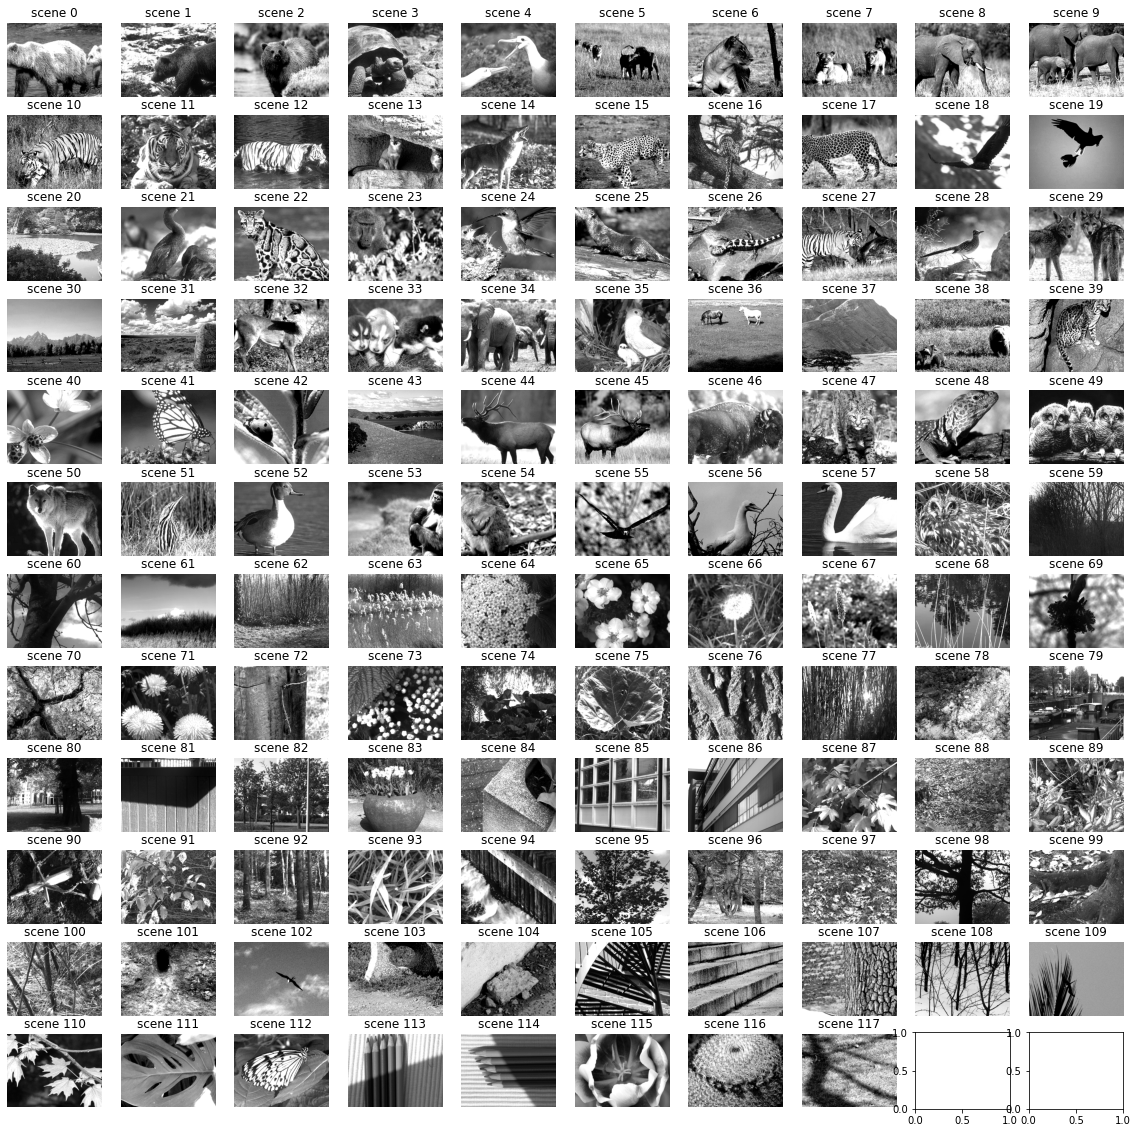

In [7]:
natural_scenes = session.stimulus_presentations[session.stimulus_presentations['stimulus_name']=='natural_scenes']

# Pull from where images are located.
boc = BrainObservatoryCache(manifest_file='boc/manifest.json')
data_set = boc.get_ophys_experiment_data(501498760)

# Show all scenes.
scene_nums = np.arange(0)

# read in the array of images
scenes = data_set.get_stimulus_template('natural_scenes')

try:
    fig, axes = plt.subplots(12, 10, figsize=(20, 20))
    for i, ax in enumerate(axes.flat):
        ax.imshow(scenes[i], cmap='gray')
        ax.set_axis_off()
        ax.set_title('scene %d' % i)
except IndexError:
    pass # ignore the IndexError and continue running the code

- Below shows when two different images were shown.

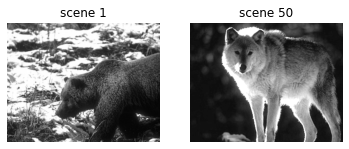

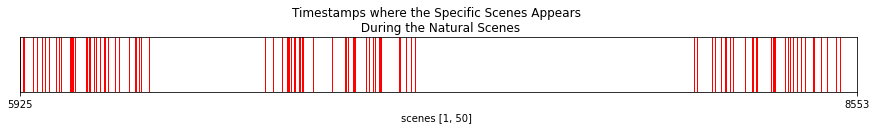

In [8]:
### Choose specific scenes to explore.
scene_nums = [1,50]

### Thank you to http://alleninstitute.github.io/AllenSDK/_static/examples/nb/brain_observatory_stimuli.html for this chunk.
boc = BrainObservatoryCache(manifest_file='boc/manifest.json')
data_set = boc.get_ophys_experiment_data(501498760)

# read in the array of images
scenes = data_set.get_stimulus_template('natural_scenes')

# Define a function that takes two arguments: a dataframe containing information about stimulus trials and a title for the plot.
# The function plots the times each specified stimulus occurs throught the timeframe.
def plot_stimulus_table(natural_scenes, title):
    fstart = natural_scenes.start_time.min()
    fend = natural_scenes.stop_time.max()
    
    fig = plt.figure(figsize=(15,1))
    ax = fig.gca()
    # Loop over each trial in the dataframe
    for i, trial in natural_scenes.iterrows():    
        # Calculate the start and stop times for the trial.
        x1 = float(trial.start_time - fstart) / (fend - fstart)
        x2 = float(trial.stop_time - fstart) / (fend - fstart)      
        # Add a rectangle to the plot.
        ax.add_patch(patches.Rectangle((x1, 0.0), x2 - x1, 1.0, color='r'))
        
    ax.set_xticks((0,1))
    ax.set_xticklabels((int(np.round(fstart)), int(np.round(fend))))
    ax.set_yticks(())
    ax.set_title("Timestamps where the Specific Scenes Appears \n During the Natural Scenes")
    ax.set_xlabel(title)

# read in the array of images
scenes = data_set.get_stimulus_template('natural_scenes')

# display a couple of the scenes
fig, axes = plt.subplots(1,len(scene_nums))
for ax,scene in zip(axes, scene_nums):
    ax.imshow(scenes[scene,:,:], cmap='gray')
    ax.set_axis_off()
    ax.set_title('scene %d' % scene)
    
# build up a mask of trials for which one of a list of scenes is visible
trial_mask = natural_scenes.frame == -2
for scene in scene_nums:
    trial_mask |= (natural_scenes.frame == scene)
natural_scenes = natural_scenes[trial_mask]

# plot the trials
plot_stimulus_table(natural_scenes, "scenes %s " % scene_nums)

### 2.2) Visualize the unique firing pattern of different single units(usually a single neuron).

This unique firing pattern allows one to differenciate between two possible neurons(units) and create a unique spike train for each.

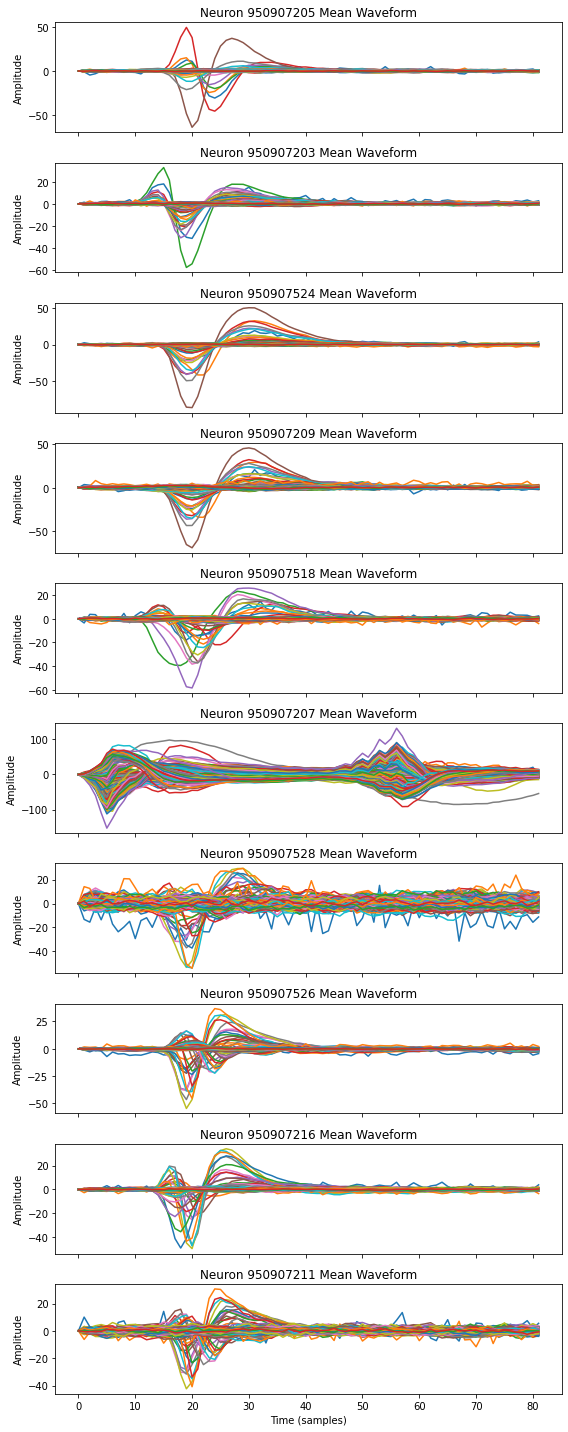

In [9]:
# Get the mean spike waveforms for each neuron
mean_waveforms = session.mean_waveforms

# Number of waveforms to display (you can change this value)
n_waveforms = 10
unit_ids = session.units.index.values

# Plot the mean spike waveforms for the first n_waveforms neurons
fig, axes = plt.subplots(n_waveforms, 1, figsize=(8, 2 * n_waveforms), sharex=True)
for i, (unit_id, ax) in enumerate(zip(unit_ids[:n_waveforms], axes)):
    waveform = mean_waveforms[unit_id]
    ax.plot(waveform.T)
    ax.set_title(f'Neuron {unit_id} Mean Waveform')
    ax.set_ylabel('Amplitude')
    ax.label_outer()

plt.xlabel('Time (samples)')
plt.tight_layout()
plt.show()


### 2.3) Raster plot of the spike trains for single units over the course of the natural scene testing. 

When the spike trains are created for each unique unit, they produce a 1 for every spike and 0 if they are not spiking at each timestep. The spike trains are plotted below for a few unique units over the natural scene time frame.

*** Add Raster Plot for binned data. ***

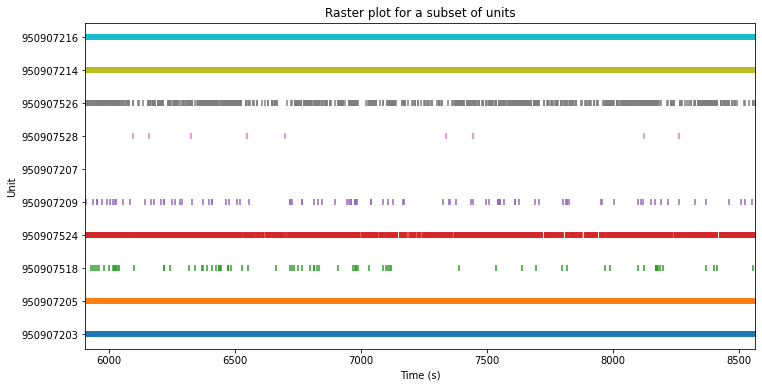

The following is the first 1000 timesteps of the data visualized. 1/30,000th of a second.
[0 1]


950907203  950907205  950907518  950907524  950907209  950907207  \
Time (s)                                                                        
5905.128132          0          0          0          0          0          0   
5905.128165          0          0          0          0          0          0   
5905.128199          0          0          0          0          0          0   
5905.128232          0          0          0          0          0          0   
5905.128265          0          0          0          0          0          0   
...                ...        ...        ...        ...        ...        ...   
5905.161266          0          0          0          0          0          0   
5905.161299          0          0          0          0          0          0   
5905.161332          0          0          0          0          0          0   
5905.161366          0          0          0          0          0          0   
5905.161399          0          0          0          0          0          0   

             950907528  950907526  950907214  950907216  
Time (s)                                                 
5905.128132          0          0          0          0  
5905.128165          0          0          0          0  
5905.128199          0          0          0          0  
5905.128232          0          0          0          0  
5905.128265          0          0          0          0  
...                ...        ...        ...        ...  
5905.161266          0          0          0          0  
5905.161299          0          0          0          0  
5905.161332          0          0          0          0  
5905.161366          0          0          0          0  
5905.161399          0          0          0          0  

[999 rows x 10 columns]

In [10]:
natural_scenes = session.stimulus_presentations[session.stimulus_presentations['stimulus_name'] == 'natural_scenes']
available_unit_ids = session.spike_times.keys()
all_spike_times = {unit_id: session.spike_times[unit_id] for unit_id in available_unit_ids}
units = cache.get_units()

# Create a function to build a raster plot.
def visualize_spike_data(num_units_to_visualize, all_spike_times, units, start_time=0, end_time=10, num_timesteps=30):
    # Select a subset of units to plot
    available_unit_ids = list(all_spike_times.keys())
    subset_unit_ids = available_unit_ids[:num_units_to_visualize]

    # Calculate the time_interval (in seconds) from the first unit's sampling rate
    time_interval = 1 / units.iloc[0]['sampling_rate']

    # Create the raster plot
    fig, ax = plt.subplots(figsize=(12, 6))

    for i, unit_id in enumerate(subset_unit_ids):
        spike_times = all_spike_times[unit_id]

        # Filter the spike times based on start_time and end_time
        filtered_spike_times = [t for t in spike_times if start_time <= t <= end_time]

        ax.scatter(filtered_spike_times, [i] * len(filtered_spike_times), marker='|')

    ax.set_xlim([start_time, end_time])
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Unit')
    ax.set_yticks(range(len(subset_unit_ids)))
    ax.set_yticklabels(subset_unit_ids)
    ax.set_title('Raster plot for a subset of units')

    plt.show()

    # Create an array of time bins
    time_bins = np.arange(start_time, start_time + num_timesteps, time_interval)

    # Only consider the first 'num_timesteps' time bins
    time_bins = time_bins[:num_timesteps]

    # Initialize an empty DataFrame with the time bins as the index
    spike_counts_df = pd.DataFrame(index=time_bins[:-1])

    # Iterate through the units and count the spikes in each time bin
    for unit_id in subset_unit_ids:
        spike_times = all_spike_times[unit_id]
        spike_counts, _ = np.histogram(spike_times, bins=time_bins)
        spike_counts_df[unit_id] = spike_counts

    # Rename the index
    spike_counts_df.index.name = 'Time (s)'

    return spike_counts_df

# Example usage:
num_units_to_visualize = 10
start_time = natural_scenes.start_time.min()
end_time = natural_scenes.stop_time.max()
num_timesteps = 1000

spike_counts_df = visualize_spike_data(num_units_to_visualize, all_spike_times, units, start_time, end_time, num_timesteps)
print('The following is the first 1000 timesteps of the data visualized. 1/30,000th of a second.')
print(np.unique(spike_counts_df))
spike_counts_df

### 2.4) Sorted correlation matrix between single units.

Below is a sorted correlation matrix between units based on their average firing rates per image for each neuron. A clustering method called Agglomerative hierarchical cluster was group the correlation matrix.  

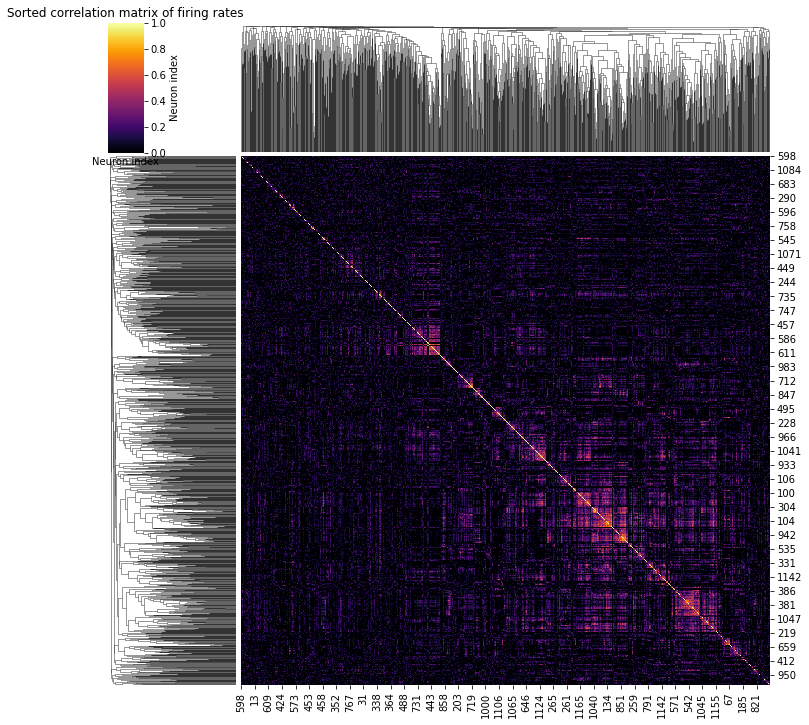

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import seaborn as sns

X = filtered_normalized_firing_rates.drop(columns=['frame'])

### This function calculates the correlation coefficient between each pair of neurons in the input matrix X (in our case, firing rates).
def custom_corrcoef(X):
    # Calculate the correlation coefficient matrix by taking the dot product of the normalized matrix and its transpose
    # Divide the result by the number of columns in X to normalize the sum
    return np.dot(X, X.T) / X.shape[1]

# Calculate the correlation matrix
corr_matrix = custom_corrcoef(X.T)

# Compute the hierarchical clustering
distance_matrix = 1 - np.abs(corr_matrix)
np.fill_diagonal(distance_matrix, 0)  # Set the diagonal to zero
linked = linkage(squareform(distance_matrix), method='average')  # The linkage function performs the cluster.

# Plot the heatmap with dendrogram-based sorting
sns.clustermap(corr_matrix, cmap='inferno', row_linkage=linked, col_linkage=linked, vmin=0, vmax=1)
plt.title("Sorted correlation matrix of firing rates")
plt.xlabel("Neuron index")
plt.ylabel("Neuron index")
plt.show()

### 2.5) Grouped heat maps of unit responses by frames.

#### 2.5.1) Heat maps of unit responses by all frames.

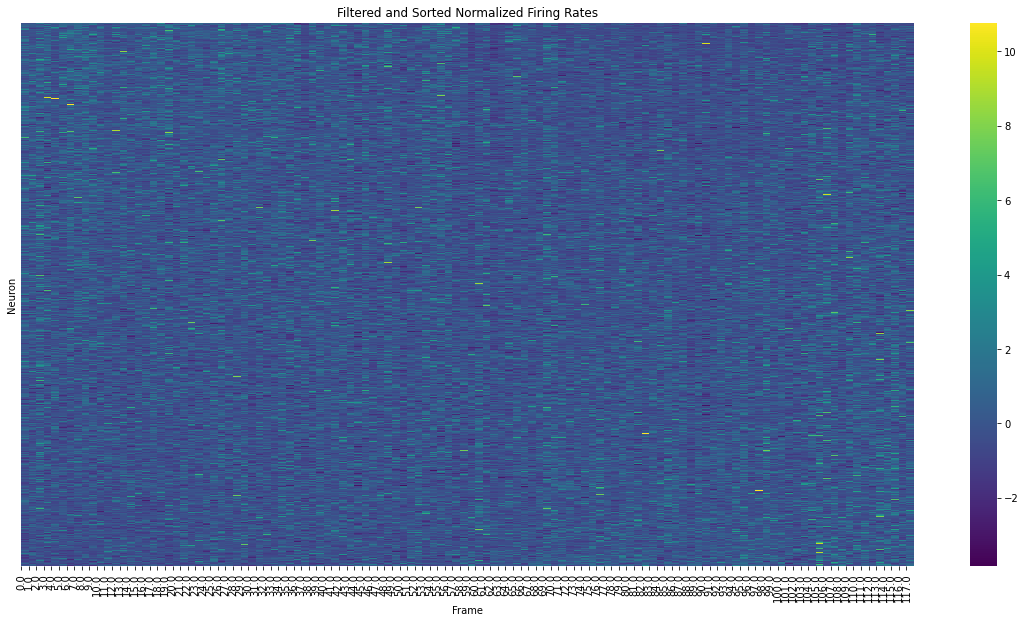

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

def plot_filtered_normalized_firing_rates(df, num_frames):
    # Calculate the correlation between the firing rates and frames
    correlation_matrix = df.corrwith(df['frame'], method='spearman')

    # Sort neurons by their correlation with the 'frame' column
    sorted_neurons = correlation_matrix[df.columns[1:]].sort_values().index.tolist()

    # Filter the DataFrame based on the desired number of frames
    filtered_df = df.head(num_frames)

    # Sort neurons by their correlation with the 'frame' column
    sorted_filtered_df = filtered_df[['frame'] + sorted_neurons]

    # Sort the DataFrame by the 'frame' column
    sorted_filtered_df.sort_values(by='frame', inplace=True)

    # Set the 'frame' column as the index of the DataFrame
    sorted_filtered_df.set_index('frame', inplace=True)

    # Create a heatmap for the filtered and sorted DataFrame
    plt.figure(figsize=(20, 10))
    ax = sns.heatmap(sorted_filtered_df.T, cmap='viridis', yticklabels=False)

    # Get unique frame values
    unique_frames = sorted_filtered_df.index.unique()

    # Set x-ticks at the middle of each frame group
    ax.set_xticks([np.where(sorted_filtered_df.index == frame)[0].mean() for frame in unique_frames])

    # Set x-tick labels to be the frame numbers
    ax.set_xticklabels(unique_frames)

    plt.xlabel('Frame')
    plt.ylabel('Neuron')
    plt.title(f'Filtered and Sorted Normalized Firing Rates')
    plt.show()

# Use the function with the desired parameters
plot_filtered_normalized_firing_rates(filtered_normalized_firing_rates, num_frames=None)

#### 2.5.1) Heat maps of unit responses by select number of frames.

/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


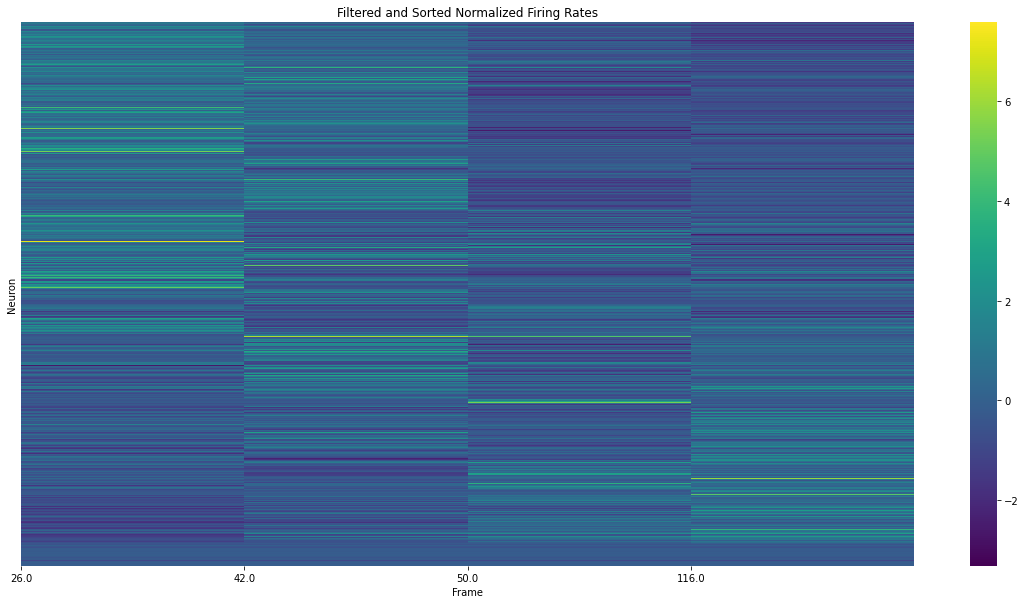

In [14]:
# Select how many neurons to show.
neurons_to_show = 4

frames_to_select = np.random.randint(0, 117 + 1, neurons_to_show)
select_images = filtered_normalized_firing_rates[filtered_normalized_firing_rates['frame'].isin(frames_to_select)]
select_images

plot_filtered_normalized_firing_rates(select_images, num_frames=None)

### 2.6) Average firing rates of units during each frame, in Hertz and by Z scores.

#### 2.6.1) Average firing rates of chosen number of units during each frames, in Hertz.

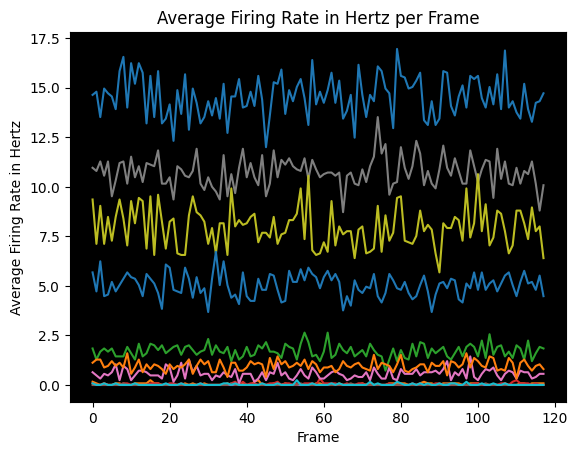

In [45]:
# Calculate the spikes per second.
spikes_per_image = spikes_per_frame.groupby('frame').mean().iloc[1:,1:]
spikes_per_image.reset_index(inplace=True)
firing_rate_hz = spikes_per_image * 4
firing_rate_hz['frame'] = spikes_per_image['frame']

# Choose how many neurons to display.
num_of_neurons_display = 12

# Set the background color to black
plt.rcParams['axes.facecolor'] = 'black'

# Plot the firing rate for each neuron
firing_rate_hz.iloc[:,1:(num_of_neurons_display+1)].plot(kind='line', legend=False)

# Add labels and title
plt.xlabel('Frame')
plt.ylabel('Average Firing Rate in Hertz')
plt.title('Average Firing Rate in Hertz per Frame')

# Show the plot
plt.show()

#### 2.6.2) Average firing rates of all units during each frames, in Hertz.

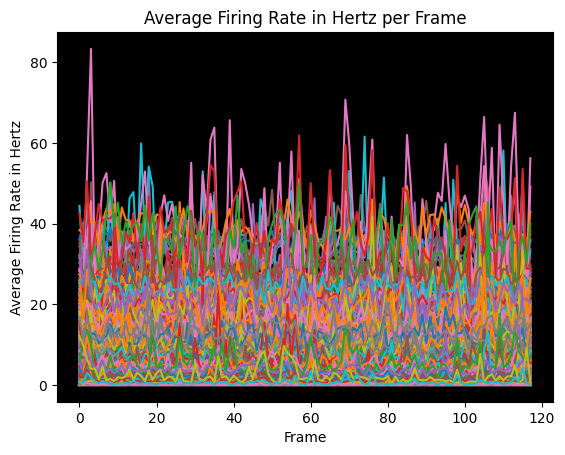

In [46]:
# Set the background color to black
plt.rcParams['axes.facecolor'] = 'black'

# Plot the firing rate for each neuron
firing_rate_hz.iloc[:,1:].plot(kind='line', legend=False)

# Add labels and title
plt.xlabel('Frame')
plt.ylabel('Average Firing Rate in Hertz')
plt.title('Average Firing Rate in Hertz per Frame')

# Show the plot
plt.show()

#### 2.6.3)  Average firing rates of all normalized units during each frames, in Hertz.

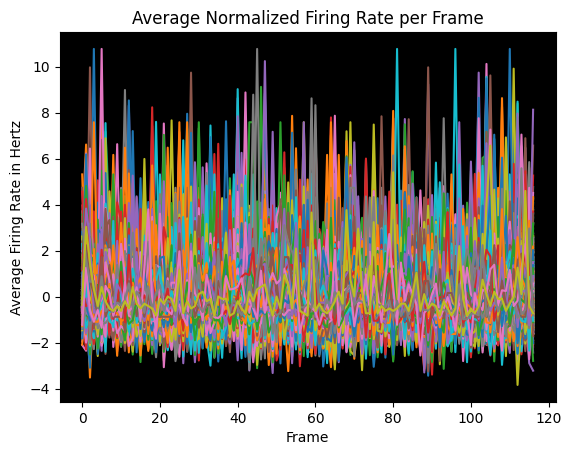

In [48]:
normalized_spikes_per_frame = filtered_normalized_firing_rates.groupby('frame').mean().iloc[1:,1:]
normalized_spikes_per_frame.reset_index(inplace=True)

# Set the background color to black
plt.rcParams['axes.facecolor'] = 'black'

# Plot the firing rate for each neuron
normalized_spikes_per_frame.iloc[:,1:].plot(kind='line', legend=False)

# Add labels and title
plt.xlabel('Frame')
plt.ylabel('Average Firing Rate in Hertz')
plt.title('Average Normalized Firing Rate per Frame')

# Show the plot
plt.show()

#### 2.6.4)  Average firing rates of chosen normalized units during each frames, in Hertz.

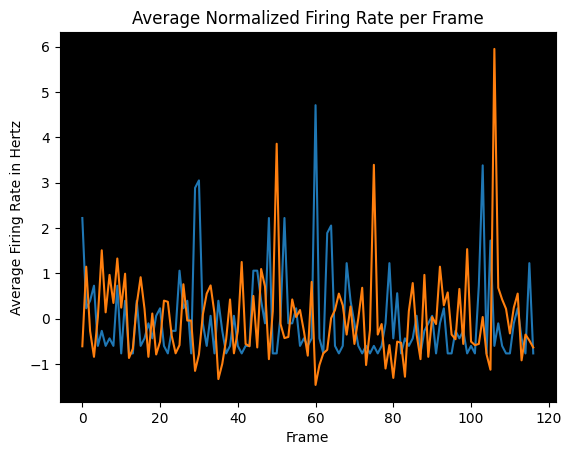

In [60]:
# Drop the 'frame' column to avoid including it in the plot
normalized_spikes_per_frame_no_index = normalized_spikes_per_frame.drop(columns=['frame'])

num_units_to_plot = 2

# Drop the 'frame' column to avoid including it in the plot
normalized_spikes_per_frame_no_index = normalized_spikes_per_frame.drop(columns=['frame'])

# Randomly select a subset of columns for plotting
random_units = normalized_spikes_per_frame_no_index.sample(n=num_units_to_plot, axis=1, random_state=np.random.randint(0, 1000))

# Plot the selected subset
random_units.plot(kind='line', legend=False)

# Add labels and title
plt.xlabel('Frame')
plt.ylabel('Average Firing Rate in Hertz')
plt.title('Average Normalized Firing Rate per Frame')

# Show the plot
plt.show()

<a name="step3content"></a>
## 3. Image Prediction Modeling
[Go to Outline](#outline)

    The goal of the image prediction modeling is to predict what image is shown based on the neuropixel data given.

- 3.0) Create train splits, test splits.
- 3.1) Baseline Model: a random guess with an accuracy of 0.85% (1/118).
- 3.2) Multivariate Logistic Regressions (MVLR)
- 3.3) Principal Component to MVLR (PC-MVLR)
- 3.4) Support Vector Classifier (SVC)
- 3.5) Neural Network with one hidden layer.
- 3.6) Neural Network with multiple hidden layers.
- 3.7) Graph Convolution Network(GCN).
- 3.8) Graph Attention Network(GAT).
- 3.9) Long Short-Term Memory(LSTM).
- 3.10) Spatio-Temporal Graph Attention Network(ST-GAT).
- 3.11) Transformer.

</div>
<img src="pictures/ST-GNN Variant Flow Chart.png" width="500" height="800" alt="Alt text"/>
</div>

### 3.0) Create train splits and test splits for non-temporal models.

Note: This section does not load in the temporal data. The temporal models all load in the temporal data based on set time steps.

In [6]:
import pickle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

spike_trains_file_path = 'output/spike_trains_with_stimulus_session_715093703_1.pkl'

with open(spike_trains_file_path, 'rb') as f:
    spike_df_average_rate = pickle.load(f)

#rint(f"Loaded spike trains dataset: {type(spike_df_average_rate)}")

def prepare_data(dataframe):
    X = dataframe.iloc[:, :-1].values
    y = dataframe.iloc[:, -1].values
    return X, y

def remove_0_columns(X):
    std_devs = np.std(X, axis=0)
    zero_std_columns = np.where(std_devs == 0)[0]
    if len(zero_std_columns) > 0:
        X = np.delete(X, zero_std_columns, axis=1)
    return X

# Prepare the data
X, y = prepare_data(spike_df_average_rate.copy())
X = remove_0_columns(X)
y = y.astype(np.float32)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
print(f'X_train shape = {np.shape(X_train)}')
print(f'X_test shape = {np.shape(X_test)}')
print(f'y_train shape = {np.shape(y_train)}')
print(f'y_test shape = {np.shape(y_test)}')

X_train shape = (4760, 2065)
X_test shape = (1190, 2065)
y_train shape = (4760,)
y_test shape = (1190,)


### 3.1) Baseline Model.

    The baseline model assumes a random guess, with an accuracy of 0.85% (1/117).

In [9]:
print(f'Test Accuracy: {np.round(1/117*100, 2)}%')

Test Accuracy: 0.85%


### 3.2) Multi-Class Regression with L2 Regularization.

In [8]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Number of classes
num_classes = 118

# Create a list to hold the models for each class
models = []

# Train a separate model for each class
for class_idx in range(num_classes):
    # Create the binary target for the current class
    y_train_binary = (y_train == class_idx).astype(int)
    
    # Create a pipeline for scaling and regression
    model = make_pipeline(StandardScaler(), Ridge())
    
    # Fit the model
    model.fit(X_train, y_train_binary)
    
    # Append the model to the list
    models.append(model)

# Predict on the test set
predictions = np.zeros((X_test.shape[0], num_classes))

for class_idx, model in enumerate(models):
    predictions[:, class_idx] = model.predict(X_test)

# Select the class with the highest predicted value for each sample
y_pred = np.argmax(predictions, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 83.36%
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        15
         0.0       0.88      0.88      0.88         8
         1.0       0.90      0.90      0.90        10
         2.0       1.00      0.71      0.83        14
         3.0       1.00      1.00      1.00         8
         4.0       0.50      0.12      0.20         8
         5.0       0.85      0.92      0.88        12
         6.0       0.92      0.92      0.92        12
         7.0       1.00      1.00      1.00         7
         8.0       0.70      1.00      0.82         7
         9.0       0.86      0.75      0.80         8
        10.0       1.00      1.00      1.00         5
        11.0       0.67      0.67      0.67         6
        12.0       1.00      0.93      0.96        14
        13.0       1.00      0.89      0.94         9
        14.0       1.00      0.92      0.96        12
        15.0       0.90      0.82      0.86        11
        16

/nas/longleaf/rhel8/apps/anaconda/2023.03.ood/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/longleaf/rhel8/apps/anaconda/2023.03.ood/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/longleaf/rhel8/apps/anaconda/2023.03.ood/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

### 3.3) Run Principal Component to MVLR

### 3.4) SVM with a Radial Kernel

In [17]:
from sklearn.svm import SVR

# Create and train the SVM model with a radial kernel
model = SVR(kernel='rbf', C=10, gamma='scale')
model.fit(X_train, y_train)

# Make predictions on the test set and round them to the nearest integer
y_pred = model.predict(X_test)
y_pred_rounded = [round(pred) for pred in y_pred]

# Calculate the accuracy of the model
correct_predictions = np.sum(np.equal(y_test, y_pred_rounded))
accuracy = correct_predictions / len(y_test) * 100

print(f"SVM Accuracy: {accuracy:.2f}%")

SVM Accuracy: 1.34%


In [18]:
### A basic PCR.
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a pipeline for PCR
for i in np.arange(1, 20, 2):
    n_components = i  # Adjust the number of components based on your data
    pcr = Pipeline([
        ('pca', PCA(n_components=n_components)),
        ('linear_regression', LinearRegression())
    ])

    # Train the PCR model
    pcr.fit(X_train, y_train)

    # Predict the test set
    y_pred = pcr.predict(X_test)

    # Convert predictions and true labels to integers (since you mentioned that each number represents a picture)
    y_pred_int = np.round(y_pred).astype(int)
    y_test_int = y_test.astype(int)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test_int, y_pred_int)
    print(f"PCR accuracy with {n_components} Principal Components: {np.round(accuracy*100, 2)}%")

# Create a pipeline for PCR
for i in np.arange(20, 110, 10):
    n_components = i  # Adjust the number of components based on your data
    pcr = Pipeline([
        ('pca', PCA(n_components=n_components)),
        ('linear_regression', LinearRegression())
    ])

    # Train the PCR model
    pcr.fit(X_train, y_train)

    # Predict the test set
    y_pred = pcr.predict(X_test)

    # Convert predictions and true labels to integers (since you mentioned that each number represents a picture)
    y_pred_int = np.round(y_pred).astype(int)
    y_test_int = y_test.astype(int)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test_int, y_pred_int)
    print(f"PCR accuracy with {n_components} Principal Components: {np.round(accuracy*100, 2)}%")

PCR accuracy with 1 Principal Components: 0.84%
PCR accuracy with 3 Principal Components: 0.76%
PCR accuracy with 5 Principal Components: 0.92%
PCR accuracy with 7 Principal Components: 1.01%
PCR accuracy with 9 Principal Components: 0.92%
PCR accuracy with 11 Principal Components: 1.26%
PCR accuracy with 13 Principal Components: 0.67%
PCR accuracy with 15 Principal Components: 0.34%
PCR accuracy with 17 Principal Components: 0.67%
PCR accuracy with 19 Principal Components: 0.59%
PCR accuracy with 20 Principal Components: 0.67%
PCR accuracy with 30 Principal Components: 1.01%
PCR accuracy with 40 Principal Components: 1.51%
PCR accuracy with 50 Principal Components: 1.18%
PCR accuracy with 60 Principal Components: 1.51%
PCR accuracy with 70 Principal Components: 1.26%
PCR accuracy with 80 Principal Components: 1.09%
PCR accuracy with 90 Principal Components: 0.67%
PCR accuracy with 100 Principal Components: 0.84%


### 3.5) Neural Network with one hidden layer.

Supports the use of Deep neural netowrks over linear models. http://cs230.stanford.edu/projects_winter_2021/reports/70532925.pdf

Loaded spike trains dataset: <class 'pandas.core.frame.DataFrame'>
Epoch [1/50], Test accuracy: 10.34%
Epoch [2/50], Test accuracy: 62.12%
Epoch [3/50], Test accuracy: 74.07%
Epoch [4/50], Test accuracy: 82.46%
Epoch [5/50], Test accuracy: 81.61%
Epoch [6/50], Test accuracy: 78.22%
Epoch [7/50], Test accuracy: 87.54%
Epoch [8/50], Test accuracy: 86.78%
Epoch [9/50], Test accuracy: 87.54%
Epoch [10/50], Test accuracy: 89.49%
Epoch [11/50], Test accuracy: 90.68%
Epoch [12/50], Test accuracy: 91.61%
Epoch [13/50], Test accuracy: 92.20%
Epoch [14/50], Test accuracy: 91.95%
Epoch [15/50], Test accuracy: 92.12%
Epoch [16/50], Test accuracy: 92.54%
Epoch [17/50], Test accuracy: 92.80%
Epoch [18/50], Test accuracy: 92.63%
Epoch [19/50], Test accuracy: 92.54%
Epoch [20/50], Test accuracy: 92.46%
Epoch [21/50], Test accuracy: 92.46%
Epoch [22/50], Test accuracy: 92.46%
Epoch [23/50], Test accuracy: 92.71%
Epoch [24/50], Test accuracy: 92.80%
Epoch [25/50], Test accuracy: 92.71%
Epoch [26/50], Te

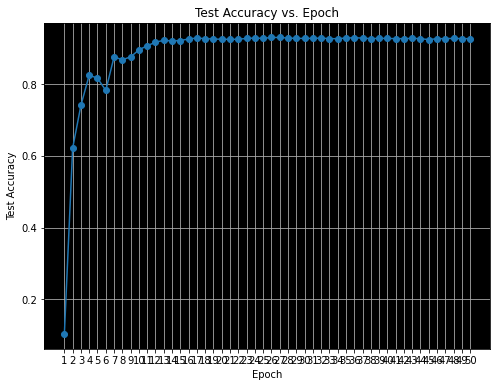

In [19]:
import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

spike_trains_file_path = 'output/spike_trains_with_stimulus_session_715093703_1.pkl'

with open(spike_trains_file_path, 'rb') as f:
    spike_df = pickle.load(f)
    print(f"Loaded spike trains dataset: {type(spike_df)}")

def prepare_data(dataframe):
    X = dataframe.iloc[:, :-1].values
    y = dataframe.iloc[:, -1].values
    return X, y

def remove_0_columns(X):
    std_devs = np.std(X, axis=0)
    zero_std_columns = np.where(std_devs == 0)[0]
    if len(zero_std_columns) > 0:
        X = np.delete(X, zero_std_columns, axis=1)
    return X

# Prepare the data
X, y = prepare_data(spike_df)
X = remove_0_columns(X)

# Convert y to numeric data type
y = y.astype(np.int64)

# Drop rows with negative labels
mask = y >= 0
X = X[mask]
y = y[mask]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
#print('X_train shape =', X_train.shape, 'X_test shape =', X_test.shape)
#print('y_train shape =', y_train.shape, 'y_test shape =', y_test.shape)

# Check the unique values in y_train and y_test
#print("Unique values in y_train:", np.unique(y_train))
#print("Unique values in y_test:", np.unique(y_test))

# Convert data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

# Create the neural network model
class Net(nn.Module):
    def __init__(self, input_dim, hidden_layer_size, num_layers, num_classes):
        super(Net, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_dim, hidden_layer_size))
        self.layers.append(nn.ReLU())
        
        for i in range(1, num_layers):
            layer_size = hidden_layer_size // (2 ** i)
            self.layers.append(nn.Linear(self.layers[-2].out_features, layer_size))
            self.layers.append(nn.ReLU())
        
        self.layers.append(nn.Linear(self.layers[-2].out_features, num_classes))
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Set the number of layers, hidden layer size, and number of classes
num_layers = 1
hidden_layer_size = 1500
num_classes = len(np.unique(y))

# Create the model and optimizer
model = Net(X_train.shape[1], hidden_layer_size, num_layers, num_classes)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

test_accuracies = []

# Train the model
num_epochs = 50
batch_size = 32
for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    # Evaluate the model
    with torch.no_grad():
        y_pred = model(X_test)
        _, y_pred_class = torch.max(y_pred, dim=1)
        accuracy = accuracy_score(y_test.numpy(), y_pred_class.numpy())
        test_accuracies.append(accuracy)
        print(f"Epoch [{epoch+1}/{num_epochs}], Test accuracy: {accuracy * 100:.2f}%")

# Create the graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), test_accuracies, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Epoch')
plt.xticks(range(1, num_epochs + 1))
plt.grid(True)
plt.show()

### 3.6) Multi-hidden Layer Neural Network

*** Need to finish wrap code in tuner.

In [20]:
import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

spike_trains_file_path = 'output/spike_trains_with_stimulus_session_715093703_1.pkl'

with open(spike_trains_file_path, 'rb') as f:
    spike_df = pickle.load(f)
    print(f"Loaded spike trains dataset: {type(spike_df)}")

def prepare_data(dataframe):
    X = dataframe.iloc[:, :-1].values
    y = dataframe.iloc[:, -1].values
    return X, y

def remove_0_columns(X):
    std_devs = np.std(X, axis=0)
    zero_std_columns = np.where(std_devs == 0)[0]
    if len(zero_std_columns) > 0:
        X = np.delete(X, zero_std_columns, axis=1)
    return X

# Prepare the data
X, y = prepare_data(spike_df)
X = remove_0_columns(X)

# Convert y to numeric data type
y = y.astype(np.int64)

# Drop rows with negative labels
mask = y >= 0
X = X[mask]
y = y[mask]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
#print('X_train shape =', X_train.shape, 'X_test shape =', X_test.shape)
#print('y_train shape =', y_train.shape, 'y_test shape =', y_test.shape)

# Check the unique values in y_train and y_test
#print("Unique values in y_train:", np.unique(y_train))
#print("Unique values in y_test:", np.unique(y_test))

# Convert data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

# Create the neural network model
class Net(nn.Module):
    def __init__(self, input_dim, hidden_layer_size, num_layers, num_classes):
        super(Net, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_dim, hidden_layer_size))
        self.layers.append(nn.ReLU())
        
        for i in range(1, num_layers):
            layer_size = hidden_layer_size // (2 ** i)
            self.layers.append(nn.Linear(self.layers[-2].out_features, layer_size))
            self.layers.append(nn.ReLU())
        
        self.layers.append(nn.Linear(self.layers[-2].out_features, num_classes))
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Set the number of layers, hidden layer size, and number of classes
num_layers = 2
hidden_layer_size = 750
num_classes = len(np.unique(y))

# Create the model and optimizer
model = Net(X_train.shape[1], hidden_layer_size, num_layers, num_classes)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Train the model
num_epochs = 50
batch_size = 32

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    

    # Evaluate the model
    with torch.no_grad():
        y_pred = model(X_test)
        _, y_pred_class = torch.max(y_pred, dim=1)
        accuracy = accuracy_score(y_test.numpy(), y_pred_class.numpy())
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test accuracy: {accuracy * 100:.2f}%")

Loaded spike trains dataset: <class 'pandas.core.frame.DataFrame'>
Epoch [1/50], Loss: 4.7695, Test accuracy: 5.25%
Epoch [2/50], Loss: 3.2309, Test accuracy: 22.71%
Epoch [3/50], Loss: 1.5956, Test accuracy: 47.97%
Epoch [4/50], Loss: 0.7870, Test accuracy: 57.97%
Epoch [5/50], Loss: 0.4138, Test accuracy: 67.29%
Epoch [6/50], Loss: 0.2889, Test accuracy: 61.95%
Epoch [7/50], Loss: 0.1310, Test accuracy: 71.61%
Epoch [8/50], Loss: 0.2257, Test accuracy: 71.19%
Epoch [9/50], Loss: 0.0507, Test accuracy: 69.41%
Epoch [10/50], Loss: 0.1908, Test accuracy: 74.41%
Epoch [11/50], Loss: 0.0234, Test accuracy: 76.10%
Epoch [12/50], Loss: 0.0223, Test accuracy: 76.95%
Epoch [13/50], Loss: 0.0044, Test accuracy: 78.31%
Epoch [14/50], Loss: 0.0909, Test accuracy: 75.85%
Epoch [15/50], Loss: 0.0036, Test accuracy: 77.71%
Epoch [16/50], Loss: 0.0014, Test accuracy: 84.66%
Epoch [17/50], Loss: 0.0010, Test accuracy: 86.19%
Epoch [18/50], Loss: 0.0007, Test accuracy: 85.68%
Epoch [19/50], Loss: 0.00

In [21]:
# Need to fix
from auto_hyperparameter_tuner import *
from torch.cuda.amp import GradScaler, autocast

param_space = {
    "wandb_project": "Predicting Visual Stimulus",
    "wandb_api_key": "7c8d251196fd96d2a93bfb6ffd0005ac030ce42b",
    "num_epochs": 50,
    "lr": tune.uniform(.001, .0001),
    "early_stop_patience": 2,
    "early_stop_delta": 0.01,
    "batch_size": 16,
    "mouse_number": 715093703,
    "timesteps": 1,
    "Architecture": 'MLNN',
    "num_samples": 100,
    "accumulation_steps": tune.choice([4]),  # Gradient accumulation
    "hidden_dim": tune.choice([32, 64, 128]),
    "num_layers": tune.choice([2, 3, 4]),
    "file_path": "/proj/STOR/pipiras/Neuropixel/output/spike_trains_with_stimulus_session_715093703_1.pkl"
}

trainer = ModelTrainer(param_space)
trainer.execute_tuning()

(_trainable pid=1592878) Loaded spike trains dataset: <class 'pandas.core.frame.DataFrame'>
(_trainable pid=1592878) X_val shape: torch.Size([47, 10, 2065, 1])
(_trainable pid=1592878) y_val shape: torch.Size([47, 1])
(_trainable pid=1592878)  
(_trainable pid=1592878) X (array): Matrix of number of batch_size, time_steps_per_frame, num_nodes, and number of features per node.
(_trainable pid=1592878) X.shape = (B, T, N, F)
(_trainable pid=1592878) X_train shape: torch.Size([428, 10, 2065, 1])
(_trainable pid=1592878) X_test shape: torch.Size([119, 10, 2065, 1])
(_trainable pid=1592878) X_train type: <class 'torch.Tensor'>
(_trainable pid=1592878)  
(_trainable pid=1592878) X_val shape: torch.Size([47, 10, 2065, 1])
(_trainable pid=1592878) y_val shape: torch.Size([47, 1])
(_trainable pid=1592878)  
(_trainable pid=1592878) y_shape = [batch_size, unique_frames_shown_per_10_timesteps]
(_trainable pid=1592878) y_train shape: torch.Size([428, 1])
(_trainable pid=1592878) y_test shape: torc

(_WandbLoggingActor pid=1593077) wandb: Currently logged in as: rayscarpenter (neuropixel-unc). Use `wandb login --relogin` to force relogin
2024-05-29 13:12:50,711	ERROR tune_controller.py:1374 -- Trial task failed for trial _trainable_d46e5fab
Traceback (most recent call last):
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(KeyError): ray::ImplicitFunc.train() (pid=1

(_trainable pid=1593540) Loaded spike trains dataset: <class 'pandas.core.frame.DataFrame'>
(_trainable pid=1593540) X_val shape: torch.Size([47, 10, 2065, 1])
(_trainable pid=1593540) y_val shape: torch.Size([47, 1])
(_trainable pid=1593540)  
(_trainable pid=1593540) X (array): Matrix of number of batch_size, time_steps_per_frame, num_nodes, and number of features per node.
(_trainable pid=1593540) X.shape = (B, T, N, F)
(_trainable pid=1593540) X_train shape: torch.Size([428, 10, 2065, 1])
(_trainable pid=1593540) X_test shape: torch.Size([119, 10, 2065, 1])
(_trainable pid=1593540) X_train type: <class 'torch.Tensor'>
(_trainable pid=1593540)  
(_trainable pid=1593540) X_val shape: torch.Size([47, 10, 2065, 1])
(_trainable pid=1593540) y_val shape: torch.Size([47, 1])
(_trainable pid=1593540)  
(_trainable pid=1593540) y_shape = [batch_size, unique_frames_shown_per_10_timesteps]
(_trainable pid=1593540) y_train shape: torch.Size([428, 1])
(_trainable pid=1593540) y_test shape: torc

(_WandbLoggingActor pid=1593740) wandb: Currently logged in as: rayscarpenter (neuropixel-unc). Use `wandb login --relogin` to force relogin
2024-05-29 13:13:06,195	ERROR tune_controller.py:1374 -- Trial task failed for trial _trainable_587f4d8a
Traceback (most recent call last):
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(KeyError): ray::ImplicitFunc.train() (pid=1

(_trainable pid=1594147) Loaded spike trains dataset: <class 'pandas.core.frame.DataFrame'>
(_trainable pid=1594147) X_val shape: torch.Size([47, 10, 2065, 1])
(_trainable pid=1594147) y_val shape: torch.Size([47, 1])
(_trainable pid=1594147)  
(_trainable pid=1594147) X (array): Matrix of number of batch_size, time_steps_per_frame, num_nodes, and number of features per node.
(_trainable pid=1594147) X.shape = (B, T, N, F)
(_trainable pid=1594147) X_train shape: torch.Size([428, 10, 2065, 1])
(_trainable pid=1594147) X_test shape: torch.Size([119, 10, 2065, 1])
(_trainable pid=1594147) X_train type: <class 'torch.Tensor'>
(_trainable pid=1594147)  
(_trainable pid=1594147) X_val shape: torch.Size([47, 10, 2065, 1])
(_trainable pid=1594147) y_val shape: torch.Size([47, 1])
(_trainable pid=1594147)  
(_trainable pid=1594147) y_shape = [batch_size, unique_frames_shown_per_10_timesteps]
(_trainable pid=1594147) y_train shape: torch.Size([428, 1])
(_trainable pid=1594147) y_test shape: torc

(_WandbLoggingActor pid=1594343) wandb: Currently logged in as: rayscarpenter (neuropixel-unc). Use `wandb login --relogin` to force relogin
2024-05-29 13:13:21,976	ERROR tune_controller.py:1374 -- Trial task failed for trial _trainable_7eb4e36a
Traceback (most recent call last):
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(KeyError): ray::ImplicitFunc.train() (pid=1

(_trainable pid=1594744) Loaded spike trains dataset: <class 'pandas.core.frame.DataFrame'>
(_trainable pid=1594744) X_val shape: torch.Size([47, 10, 2065, 1])
(_trainable pid=1594744) y_val shape: torch.Size([47, 1])
(_trainable pid=1594744)  
(_trainable pid=1594744) X (array): Matrix of number of batch_size, time_steps_per_frame, num_nodes, and number of features per node.
(_trainable pid=1594744) X.shape = (B, T, N, F)
(_trainable pid=1594744) X_train shape: torch.Size([428, 10, 2065, 1])
(_trainable pid=1594744) X_test shape: torch.Size([119, 10, 2065, 1])
(_trainable pid=1594744) X_train type: <class 'torch.Tensor'>
(_trainable pid=1594744)  
(_trainable pid=1594744) X_val shape: torch.Size([47, 10, 2065, 1])
(_trainable pid=1594744) y_val shape: torch.Size([47, 1])
(_trainable pid=1594744)  
(_trainable pid=1594744) y_shape = [batch_size, unique_frames_shown_per_10_timesteps]
(_trainable pid=1594744) y_train shape: torch.Size([428, 1])
(_trainable pid=1594744) y_test shape: torc

(_WandbLoggingActor pid=1594937) wandb: Currently logged in as: rayscarpenter (neuropixel-unc). Use `wandb login --relogin` to force relogin
2024-05-29 13:13:39,036	ERROR tune_controller.py:1374 -- Trial task failed for trial _trainable_5175c62f
Traceback (most recent call last):
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(KeyError): ray::ImplicitFunc.train() (pid=1

(_trainable pid=1595339) Loaded spike trains dataset: <class 'pandas.core.frame.DataFrame'>
(_trainable pid=1595339) X_val shape: torch.Size([47, 10, 2065, 1])
(_trainable pid=1595339) y_val shape: torch.Size([47, 1])
(_trainable pid=1595339)  
(_trainable pid=1595339) X (array): Matrix of number of batch_size, time_steps_per_frame, num_nodes, and number of features per node.
(_trainable pid=1595339) X.shape = (B, T, N, F)
(_trainable pid=1595339) X_train shape: torch.Size([428, 10, 2065, 1])
(_trainable pid=1595339) X_test shape: torch.Size([119, 10, 2065, 1])
(_trainable pid=1595339) X_train type: <class 'torch.Tensor'>
(_trainable pid=1595339)  
(_trainable pid=1595339) X_val shape: torch.Size([47, 10, 2065, 1])
(_trainable pid=1595339) y_val shape: torch.Size([47, 1])
(_trainable pid=1595339)  
(_trainable pid=1595339) y_shape = [batch_size, unique_frames_shown_per_10_timesteps]
(_trainable pid=1595339) y_train shape: torch.Size([428, 1])
(_trainable pid=1595339) y_test shape: torc

(_WandbLoggingActor pid=1595541) wandb: Currently logged in as: rayscarpenter (neuropixel-unc). Use `wandb login --relogin` to force relogin
2024-05-29 13:13:55,800	ERROR tune_controller.py:1374 -- Trial task failed for trial _trainable_7956d04e
Traceback (most recent call last):
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(KeyError): ray::ImplicitFunc.train() (pid=1

(_trainable pid=1595945) Loaded spike trains dataset: <class 'pandas.core.frame.DataFrame'>
(_trainable pid=1595945) X_val shape: torch.Size([47, 10, 2065, 1])
(_trainable pid=1595945) y_val shape: torch.Size([47, 1])
(_trainable pid=1595945)  
(_trainable pid=1595945) X (array): Matrix of number of batch_size, time_steps_per_frame, num_nodes, and number of features per node.
(_trainable pid=1595945) X.shape = (B, T, N, F)
(_trainable pid=1595945) X_train shape: torch.Size([428, 10, 2065, 1])
(_trainable pid=1595945) X_test shape: torch.Size([119, 10, 2065, 1])
(_trainable pid=1595945) X_train type: <class 'torch.Tensor'>
(_trainable pid=1595945)  
(_trainable pid=1595945) X_val shape: torch.Size([47, 10, 2065, 1])
(_trainable pid=1595945) y_val shape: torch.Size([47, 1])
(_trainable pid=1595945)  
(_trainable pid=1595945) y_shape = [batch_size, unique_frames_shown_per_10_timesteps]
(_trainable pid=1595945) y_train shape: torch.Size([428, 1])
(_trainable pid=1595945) y_test shape: torc

(_WandbLoggingActor pid=1596142) wandb: Currently logged in as: rayscarpenter (neuropixel-unc). Use `wandb login --relogin` to force relogin
2024-05-29 13:14:11,724	ERROR tune_controller.py:1374 -- Trial task failed for trial _trainable_6d02f5b8
Traceback (most recent call last):
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(KeyError): ray::ImplicitFunc.train() (pid=1

(_trainable pid=1596544) Loaded spike trains dataset: <class 'pandas.core.frame.DataFrame'>
(_trainable pid=1596544) X_val shape: torch.Size([47, 10, 2065, 1])
(_trainable pid=1596544) y_val shape: torch.Size([47, 1])
(_trainable pid=1596544)  
(_trainable pid=1596544) X (array): Matrix of number of batch_size, time_steps_per_frame, num_nodes, and number of features per node.
(_trainable pid=1596544) X.shape = (B, T, N, F)
(_trainable pid=1596544) X_train shape: torch.Size([428, 10, 2065, 1])
(_trainable pid=1596544) X_test shape: torch.Size([119, 10, 2065, 1])
(_trainable pid=1596544) X_train type: <class 'torch.Tensor'>
(_trainable pid=1596544)  
(_trainable pid=1596544) X_val shape: torch.Size([47, 10, 2065, 1])
(_trainable pid=1596544) y_val shape: torch.Size([47, 1])
(_trainable pid=1596544)  
(_trainable pid=1596544) y_shape = [batch_size, unique_frames_shown_per_10_timesteps]
(_trainable pid=1596544) y_train shape: torch.Size([428, 1])
(_trainable pid=1596544) y_test shape: torc

(_WandbLoggingActor pid=1596740) wandb: Currently logged in as: rayscarpenter (neuropixel-unc). Use `wandb login --relogin` to force relogin
2024-05-29 13:14:26,869	ERROR tune_controller.py:1374 -- Trial task failed for trial _trainable_08abdc4f
Traceback (most recent call last):
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(KeyError): ray::ImplicitFunc.train() (pid=1

(_trainable pid=1597143) Loaded spike trains dataset: <class 'pandas.core.frame.DataFrame'>
(_trainable pid=1597143) X_val shape: torch.Size([47, 10, 2065, 1])
(_trainable pid=1597143) y_val shape: torch.Size([47, 1])
(_trainable pid=1597143)  
(_trainable pid=1597143) X (array): Matrix of number of batch_size, time_steps_per_frame, num_nodes, and number of features per node.
(_trainable pid=1597143) X.shape = (B, T, N, F)
(_trainable pid=1597143) X_train shape: torch.Size([428, 10, 2065, 1])
(_trainable pid=1597143) X_test shape: torch.Size([119, 10, 2065, 1])
(_trainable pid=1597143) X_train type: <class 'torch.Tensor'>
(_trainable pid=1597143)  
(_trainable pid=1597143) X_val shape: torch.Size([47, 10, 2065, 1])
(_trainable pid=1597143) y_val shape: torch.Size([47, 1])
(_trainable pid=1597143)  
(_trainable pid=1597143) y_shape = [batch_size, unique_frames_shown_per_10_timesteps]
(_trainable pid=1597143) y_train shape: torch.Size([428, 1])
(_trainable pid=1597143) y_test shape: torc

(_WandbLoggingActor pid=1597335) wandb: Currently logged in as: rayscarpenter (neuropixel-unc). Use `wandb login --relogin` to force relogin
2024-05-29 13:14:43,309	ERROR tune_controller.py:1374 -- Trial task failed for trial _trainable_529844c6
Traceback (most recent call last):
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/nas/longleaf/home/rayrayc/.local/lib/python3.9/site-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(KeyError): ray::ImplicitFunc.train() (pid=1

RuntimeError: No best trial found for the given metric: test_acc. This means that no trial has reported this metric, or all values reported for this metric are NaN. To not ignore NaN values, you can set the `filter_nan_and_inf` arg to False.

### 3.7) Graph Convolutional Network

This will begin with a fully connected graph between all nodes and trim nodes from that point or from a correlation matrix.
The current implementation doesn't have graph batching and will require larger compute power compared to other models in this benchmark system.
Even with batching, this is computationally expensive.

In [ ]:
from models.gat_trainer import *
from torch.cuda.amp import GradScaler, autocast

param_space = {
    "wandb_project": "Predicting Visual Stimulus",
    "wandb_api_key": "7c8d251196fd96d2a93bfb6ffd0005ac030ce42b",
    "num_epochs": 50,
    "lr": 0.0005,
    "spatial_hidden_dim": tune.randint(1,10),
    "edge_threshold": .25,
    "early_stop_patience": 3,
    "early_stop_delta": 0.01,
    "batch_size": 2,
    "mouse_number": 715093703,
    "timesteps": 1,
    "Architecture": 'GCN',
    "num_samples": 100,
    "accumulation_steps": 2,  # Gradient accumulation
    "use_auto_corr_matrix": False,
    "file_path": "/proj/STOR/pipiras/Neuropixel/output/spike_trains_with_stimulus_session_715093703_1.pkl",
    "spatial_out_features":1,
    
    # Not used in this model.
    "graph_lr": .05,  
    "graph_batch_size": 16,
    "temporal_hidden_dim": 250,    
    "temporal_layer_dimension":1 
}

trainer = ModelTrainer(param_space)
trainer.execute_tuning()

### 3.8) Graph Attention Network(GAT).

This will begin with a fully connected graph between all nodes and trim nodes from that point or from a correlation matrix.
The current implementation doesn't have graph batching and will require larger compute power compared to other models in this benchmark system.
Even with batching, this is computationally expensive.

GAT documentation: https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.nn.conv.GATConv.html

In [1]:
from models.gat_trainer import *
from torch.cuda.amp import GradScaler, autocast

param_space = {
    "wandb_project": "Predicting Visual Stimulus",
    "wandb_api_key": "7c8d251196fd96d2a93bfb6ffd0005ac030ce42b",
    "num_epochs": 50,
    "lr": 0.0005,
    "spatial_hidden_dim": tune.randint(10,25),
    "edge_threshold": .25,
    "early_stop_patience": 3,
    "early_stop_delta": 0.01,
    "batch_size": 2,
    "mouse_number": 715093703,
    "timesteps": 1,
    "Architecture": 'GAT',
    "num_samples": 100,
    "accumulation_steps": 2,  # Gradient accumulation
    "use_auto_corr_matrix": False,
    "file_path": "/proj/STOR/pipiras/Neuropixel/output/spike_trains_with_stimulus_session_715093703_1.pkl",
    "spatial_out_features":1,
    "graph_lr": .05,  # Adjust the range as needed
    "graph_batch_size": 16,
    
    "temporal_hidden_dim": 250,    #remove from here
    "temporal_layer_dimension":1 #remove from here
}

trainer = ModelTrainer(param_space)
trainer.execute_tuning()

2024-05-16 10:26:54,057	INFO worker.py:1724 -- Started a local Ray instance.


KeyboardInterrupt: 

### 3.9) Long-Short Term Memory model.

   The purpose of the following Long Short-Term Memory (LSTM) model is to account for temporal dependencies while using deep learning to predict a categorical outcome. Given a sequence of inputs $x_1, . . . , x_T$, the LSTM model attempts to predict a corresponding sequence of outputs $y_1, . . . , y_{T'}$. The sequence of inputs are the firing rates of indivual units and the sequence of outputs is the log probability for each frame. It does this by two states, one for long term time dependencies and one for short term. These are referred to as the cell and hidden states. In our model, we make a prediction from the frame that has the highest log probability.

   Formally, this can be described as the LSTM model learning a probability distribution over sequences of outputs conditioned on sequences of inputs, expressed as:

$$
p(y_1, . . . , y_{T'} | x_1, . . . , x_T ) = \prod_{t=1}^{T'} p(y_t|h_{t-1}, c_{t-1}, x_t)
$$

   Where $x_t$ is the firing rate at each timestep $t$, $x_T$ is all the firing rates for each uniqe frame, $y_t$ is the log probability of the frame shown at each timestep $t$, $y_T$ is the log probability of which frame was shown for each frame. $h_{t-1}$ is the hidden state at time $t-1$, and $c_{t-1}$ is the cell state at time $t-1$.

   The ability to selectively forget information comes from its gating mechanisms. This is useful for when time dependencies might change. Each frame is shown for a quarter of a second, or 0.25 seconds. Say our data has been processed where each unique frame shown is split between 10 rows/timesteps. When we are making a prediction about each frame the model uses the output of the model from the final timestep of that frame. In this case we would only make one guess per unique frame shown. 

   This LSTM cell takes as input the current firing rate of each neuron $x_t$ and the previous hidden state $h_{t-1}$, and outputs a new hidden state $h_t$ and a new cell state $c_t$. The hidden state represents the short term memory while the cell state represents the long term memory. This process can be described by the following equations:

1. **Forget gate:**
    $$
    f_t = \sigma(W_{if} \cdot x_t + b_{if} + W_{hf} \cdot h_{t-1} + b_{hf})
    $$

2. **Input gate:**
    $$
    i_t = \sigma(W_{ii} \cdot x_t + b_{ii} + W_{hi} \cdot h_{t-1} + b_{hi})
    $$

3. **Candidate cell state:**
    $$
    g_t = \tanh(W_{ig} \cdot x_t + b_{ig} + W_{hg} \cdot h_{t-1} + b_{hg})
    $$

4. **Update cell state:**
   $$
   c_t = f_t \odot c_{t-1} + i_t \odot g_t
   $$
   
5. **Output gate:**
   $$
   o_t = \sigma(W_{io} \cdot x_t + b_{io} + W_{ho} \cdot h_{t-1} + b_{ho})
   $$
   
6. **Update hidden state:**
   $$
   h_t = o_t \odot \tanh(c_t)
   $$
  
7. **Output layer:**
   $$
   y_t = W_y \cdot h_t + b_y
   $$
  
8. **Prediction:**
   $$
   \hat{y}_t = argmax ( softmax (y_T))
   $$

      The model uses the forget gate(step 1), input gate(step 2), and the canidate cell state(step 3) to update the long term memory(step 4). It then creates the output gate(step 5), which represents the short term memory. This step only accounts for information from the current unique frame. The model then takes into account both long and short term memory by using the Hadamard product between the output gate and the $tanh$ of the cell state.
      The output ${y}_t$ is a vector of size equal to the number of classes in the output space. $\hat{y}_t$ Each element of this vector represents the score for a particular class. The class with the highest score is the model's prediction.

#### LSTM Parameters

- $x_t$: the input vector at time $t$. This is the firing rates of all neurons at time $t$. It is a vector where $m$ represents the number of features. In our case it is equal to the number of neurons in our dataset.
    $$
    x_{t} = x_{1,t} ,..., x_{m,t}
    $$    

- $h_{t-1}$: the hidden state at time $t-1$. This is the output of the LSTM cell from the previous time step. It also represents the short term memory. It is a vector. Where "n" represents the hyperparameter size known as the hidden dimension. It is set by "hidden_dim" in this program. In this model batch processing is used and the short-term memory resets between frames. This means the model is considered "stateless"(opposed to "stateful"). This means that the hidden state information doesn't carry over between each frame. The pictures shown aren't related, so the direct temporal information from the timestep from one unique frame to the other may not matter. This is why we uses "stateless" here.
    $$
    h_{t-1} = h_{1,t-1},...,h_{n,t-1}
    $$    

- $c_{t-1}$: the cell state at time $t-1$, i.e., the internal memory of the LSTM cell from the previous time step. Similar to the past long term memory.
 
- $W_{if}, W_{ii}, W_{ig}, W_{io}$: weight matrices for the forget gate, input gate, cell candidate, and the output gate for $x_t$. If the number of features of $x_t$ are $m$ and the hidden dimensions are $n$, then these weight matrices are shape $n \times m$.

- $W_{hf}, W_{hi}, W_{hg}, W_{ho}$: weight matrices for the forget gate, input gate, cell candidate, and the output gate for $h_{t-1}$. If the number of features of the hidden state are $n$, then these matrices will be of shape $n \times n$.

- $b_{if}, b_{ii}, b_{ig}, b_{io}$: bias terms for the forget gate, input gate, cell candidate, and the output gate respectively. These are a vector of length $n$, size of the hidden dimension.

- $b_{hf}, b_{hi}, b_{hg}, b_{ho}$: bias terms for the forget gate, input gate, cell candidate, and the output gate respectively. These are a vector of length $n$, size of the hidden dimension.

- $W_y$: the weight matrix for the output layer. If there are $n$ hidden dimensions and $k$ classes, the matrix will be $k \times n$.

- $b_y$: the bias term for the output layer. This is of lenth $k$, where $k$ is the number of classes.

- $f_t, i_t, \tilde{c}_t, o_t$: the outputs of the forget gate, input gate, cell candidate, and output gate at time $t$, respectively. Each iteration is a vector of length $n$, where $n$ is the number of hidden dimensions.

- $c_t$: the cell state at time $t$, which is a combination of the previous cell state and the current cell candidate, controlled by the forget gate and input gate. Each iteration is a vector of length $n$, where $n$ is the number of hidden dimensions. 

- $h_t$: This is a matrix of shape $t \times n$, where $t$ is the number of timesteps and $n$ is the size of the hidden dimesion. A unique hidden state is produced for each timestep. The collection of these hidden states is what is used to produce the prediction for each unique frame.

- ${y}_t$: the output vector of the predicted log probabilities for each frame. The output matrix will be of length $n /times t$.  Our model only takes into account the final timestep of each frame.

- ${y}_T$: is the output vector of the final predicted log probabilities for each frame. If there are 10 timesteps per frame, then the 10th one will be considered.

       **Note: We should try averaging these instead of taking the final output. It would be a matrix of length (n). However, it would take the average of the output over the ten timesteps. It would take from a (t X n) matrix. 


- $\hat{y}_t$: is the prediction for that frame. There will be one output per unique frame. If each frame is broken into 10 timesteps or 100, there will still only be one output per frame.

Reference: Sutskever, I., Vinyals, O., & Le, Q. V. (2014). Sequence to sequence learning with neural networks. In Advances in Neural Information Processing Systems (pp. 3104-3112). \
Code Reference:https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html \

LSTM Package Documentation: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

References - Paper model overview: http://www.bioinf.jku.at/publications/older/2604.pdf \
    -Paper above model is modeled after: https://proceedings.neurips.cc/paper_files/paper/2014/file/a14ac55a4f27472c5d894ec1c3c743d2-Paper.pdf \
    -Explanation - This guy worked at the stats dept at UNC I believe. https://www.youtube.com/watch?v=YCzL96nL7j0&ab_channel=StatQuestwithJoshStarmer \
    -step by step: https://colah.github.io/posts/2015-08-Understanding-LSTMs/

In [29]:
import pickle
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

spike_trains_file_path = 'output/spike_trains_with_stimulus_session_715093703_1.pkl'

with open(spike_trains_file_path, 'rb') as f:
    spike_df = pickle.load(f)

### Create 3D tensors to be passed to the LSTM model.

# Create X and y.
X = spike_df.drop(columns=['frame']).values
y = spike_df['frame'].values

# Encode categorical wtarget values
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Create train/test split.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, shuffle=False)

# Set sequence length and determine new number of samples
seq_len = 1 # Set sequence length
num_samples_train = X_train.shape[0] // seq_len
num_features = X_train.shape[1]

# Determine the new number of samples.
num_samples_test = X_test.shape[0] // seq_len

# Reshape input to have 3 dimensions. (samples, timesteps, features/units)
X_train = X_train[:num_samples_train*seq_len]  
X_train = X_train.reshape(num_samples_train, seq_len, num_features)

# Reshape output to match input
y_train = y_train[:num_samples_train*seq_len]  # Make the total length divisible by seq_len
y_train = y_train.reshape(num_samples_train, seq_len, 1)  # Keep as 2D tensor
y_train = y_train[:, -1]  # Predicting a single value for each sequence

# Reshape input to be 3D (samples, timesteps, features)
X_test = X_test[:num_samples_test*seq_len]  # Make the total length divisible by seq_len
X_test = X_test.reshape(num_samples_test, seq_len, num_features)

# Reshape output to match input
y_test = y_test[:num_samples_test*seq_len]  # Make the total length divisible by seq_len
y_test = y_test.reshape(num_samples_test, seq_len, 1)  # Keep as 2D tensor
y_test = y_test[:, -1]  # Predicting a single value for each sequence

# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

# Convert numpy arrays to PyTorch tensors
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

print(f"X_train type: {type(X_train)}")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test type: {type(X_test)}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

### Implement an LSTM model with 1 feature vector.
from torch.utils.data import DataLoader

# Reshape X data to be 3D. This is useful if passing a 4d tensor, where there is an extra dimension that represents different features of each node.
# 4D X ,(batch_size, timesteps_per_frame, nodes, features), becomes 3D (batch_size, timesteps_per_frame, nodes * features)
X_train = X_train.view(X_train.size(0), X_train.size(1), -1)
X_test = X_test.view(X_test.size(0), X_test.size(1), -1)

# LSTM Model Parameters
input_dim = X_train.shape[-1]  # replace with the input dimension
hidden_dim = 2000 # replace with the hidden dimension
layer_dim = 1 # replace with the layer dimension; usually between 1-3
num_classes = X_train.shape[-1]
output_dim = len(np.unique(y))  # replace with the output dimension

# Training Parameters
sequence_length = seq_len  # replace with the sequence length
input_size = input_dim  # replace with the input size
learning_rate = 0.001  # replace with the learning rate
num_epochs = 15  # replace with the number of epochs
batch_size = 64  # You can adjust this value according to your preference and memory capacity

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True) # LSTM layer
        self.fc = nn.Linear(hidden_dim, output_dim) # Fully connected layer

    def forward(self, x):
        '''
        X (array): Matrix consists of batch_size, time_steps_per_frame, num_nodes. X.shape = (B, T, N).
        '''
        # Initialize hidden and cell states. h0 and c0 respectively.
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
        
        # Forward propagate the LSTM.
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        
        # Decode the hidden state of the last time step
        # This means our prediction comes from the output of the final timestep of that frame.
        out = self.fc(out[:, -1, :]) 
        
        return out
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Create the LSTM model.
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim).to(device)
'''
print(input_dim)
print(hidden_dim)
print(layer_dim)
print(output_dim)
'''
# Set the loss function and optimizer.
criterion = nn.CrossEntropyLoss()  # use cross entropy loss function for multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Convert test data to tensor in preperation for the laoder.
X_test_tensor = torch.Tensor(X_test).view(-1, sequence_length, input_dim).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

# Create DataLoaders for training and testing data.
train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(list(zip(X_test_tensor, y_test_tensor)), batch_size=batch_size, shuffle=True)

# Set total of test samples.
total_test_samples = len(X_test)

# Training loop
for epoch in range(num_epochs):  # Loop over the dataset multiple times
    model.train()  # Set the model to training mode
    train_running_loss = 0.0  # Initialize running loss to 0.0
    correct_train_preds = 0.0  # Initialize the number of correct predictions to 0.0
    total_train_samples = 0.0  # Initialize the total number of training samples to 0.0
    correct = 0
    # Training step
    for i, (features, labels) in enumerate(train_loader):  # Loop over the training data
        #print(i)
        #print(type(features))
        #print(np.shape(labels))
        features = features.view(-1, sequence_length, input_dim).to(device)  # Reshape the features and move them to the device
        labels = labels.to(device)  # Move the labels to the device

        # Forward pass
        out = model(features)  # Pass the features through the model to get the output

        # Flatten labels to a 1D tensor
        labels = labels.view(-1)  # Flatten the labels
        #print(np.shape(labels))
        # If labels are one-hot encoded, convert to class indices
        if labels.dim() > 1:  # If the labels are one-hot encoded
            labels = torch.argmax(labels, dim=1)  # Convert to class indices

        # Ensure labels are of the correct data type
        labels = labels.long()  # Convert labels to long type
        
        # Compute the loss
        loss = criterion(out, labels)  # Compute the loss between the output and the labels

        # Backward pass and optimization
        optimizer.zero_grad()  # Zero the parameter gradients
        loss.backward()  # Perform a backward pass to compute the gradients
        optimizer.step()  # Perform an optimization step to update the parameters

        train_running_loss += loss.detach().item()  # Add the loss to the running loss
        _, preds = torch.max(out, dim=1)  # Get the predicted classes
        correct_train_preds += (preds == labels).sum().item()  # Add the number of correct predictions to the total
        total_train_samples += labels.shape[0]  # Add the number of labels to the total number of samples

    model.eval()  # Set the model to evaluation mode
    correct_test_preds = 0.0  # Initialize the number of correct test predictions to 0.0
    total_test_samples = 0.0  # Initialize the total number of test samples to 0.0
    
    # Test step
    for i, (features, labels) in enumerate(test_loader):  # Loop over the test data
        features = features.view(-1, sequence_length, input_dim).to(device)  # Reshape the features and move them to the device
        labels = labels.to(device)  # Move the labels to the device
        labels = labels.squeeze()  # Remove the extra dimension from the labels tensor
        out = model(features)  # Pass the features through the model to get the output
        _, preds = torch.max(out, dim=1)  # Get the predicted classes
        correct = (preds == labels).sum().item()  # Compute the number of correct predictions
        correct_test_preds += correct  # Add the number of correct predictions to the total
        total_test_samples += labels.shape[0]  # Add the number of labels to the total number of samples


    train_acc = correct_train_preds / total_train_samples * 100  # Compute the training accuracy
    test_acc = correct_test_preds / total_test_samples * 100  # Compute the test accuracy

    print(f'Epoch {epoch+1}, Loss: {np.round(train_running_loss/i,2)}, Train Acc: {np.round(train_acc,2)}%, Test Acc: {np.round(test_acc,2)}%')

X_train type: <class 'torch.Tensor'>
X_train shape: torch.Size([4760, 1, 2073])
y_train shape: torch.Size([4760, 1])
X_test type: <class 'torch.Tensor'>
X_test shape: torch.Size([1190, 1, 2073])
y_test shape: torch.Size([1190, 1])
Epoch 1, Loss: 19.71, Train Acc: 1.37%, Test Acc: 3.03%
Epoch 2, Loss: 18.19, Train Acc: 11.11%, Test Acc: 20.59%
Epoch 3, Loss: 14.94, Train Acc: 41.32%, Test Acc: 58.91%
Epoch 4, Loss: 11.22, Train Acc: 67.17%, Test Acc: 81.85%
Epoch 5, Loss: 7.96, Train Acc: 78.95%, Test Acc: 88.99%
Epoch 6, Loss: 5.86, Train Acc: 83.17%, Test Acc: 91.93%
Epoch 7, Loss: 4.62, Train Acc: 84.59%, Test Acc: 94.54%
Epoch 8, Loss: 3.95, Train Acc: 84.82%, Test Acc: 95.46%
Epoch 9, Loss: 3.57, Train Acc: 85.07%, Test Acc: 95.97%
Epoch 10, Loss: 3.39, Train Acc: 84.92%, Test Acc: 95.63%
Epoch 11, Loss: 3.28, Train Acc: 84.9%, Test Acc: 95.63%
Epoch 12, Loss: 3.19, Train Acc: 84.95%, Test Acc: 96.3%
Epoch 13, Loss: 3.14, Train Acc: 85.05%, Test Acc: 96.05%
Epoch 14, Loss: 3.11, Tr

In [28]:
import pickle
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

spike_trains_file_path = 'output/spike_trains_with_stimulus_session_715093703_2.pkl'

with open(spike_trains_file_path, 'rb') as f:
    spike_df = pickle.load(f)

### Create 3D tensors to be passed to the LSTM model.

# Create X and y.
X = spike_df.drop(columns=['frame']).values
y = spike_df['frame'].values

# Encode categorical wtarget values
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Create train/test split.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, shuffle=False)

# Set sequence length and determine new number of samples
seq_len = 2 # Set sequence length
num_samples_train = X_train.shape[0] // seq_len
num_features = X_train.shape[1]

# Determine the new number of samples.
num_samples_test = X_test.shape[0] // seq_len

# Reshape input to have 3 dimensions. (samples, timesteps, features/units)
X_train = X_train[:num_samples_train*seq_len]  
X_train = X_train.reshape(num_samples_train, seq_len, num_features)

# Reshape output to match input
y_train = y_train[:num_samples_train*seq_len]  # Make the total length divisible by seq_len
y_train = y_train.reshape(num_samples_train, seq_len, 1)  # Keep as 2D tensor
y_train = y_train[:, -1]  # Predicting a single value for each sequence

# Reshape input to be 3D (samples, timesteps, features)
X_test = X_test[:num_samples_test*seq_len]  # Make the total length divisible by seq_len
X_test = X_test.reshape(num_samples_test, seq_len, num_features)

# Reshape output to match input
y_test = y_test[:num_samples_test*seq_len]  # Make the total length divisible by seq_len
y_test = y_test.reshape(num_samples_test, seq_len, 1)  # Keep as 2D tensor
y_test = y_test[:, -1]  # Predicting a single value for each sequence

# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

# Convert numpy arrays to PyTorch tensors
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

print(f"X_train type: {type(X_train)}")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test type: {type(X_test)}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

### Implement an LSTM model with 1 feature vector.
from torch.utils.data import DataLoader

# Reshape X data to be 3D. This is useful if passing a 4d tensor, where there is an extra dimension that represents different features of each node.
# 4D X ,(batch_size, timesteps_per_frame, nodes, features), becomes 3D (batch_size, timesteps_per_frame, nodes * features)
X_train = X_train.view(X_train.size(0), X_train.size(1), -1)
X_test = X_test.view(X_test.size(0), X_test.size(1), -1)

# LSTM Model Parameters
input_dim = X_train.shape[-1]  # replace with the input dimension
hidden_dim = 2000 # replace with the hidden dimension
layer_dim = 1 # replace with the layer dimension; usually between 1-3
num_classes = X_train.shape[-1]
output_dim = len(np.unique(y))  # replace with the output dimension

# Training Parameters
sequence_length = seq_len  # replace with the sequence length
input_size = input_dim  # replace with the input size
learning_rate = 0.001  # replace with the learning rate
num_epochs = 15  # replace with the number of epochs
batch_size = 64  # You can adjust this value according to your preference and memory capacity

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True) # LSTM layer
        self.fc = nn.Linear(hidden_dim, output_dim) # Fully connected layer

    def forward(self, x):
        '''
        X (array): Matrix consists of batch_size, time_steps_per_frame, num_nodes. X.shape = (B, T, N).
        '''
        # Initialize hidden and cell states. h0 and c0 respectively.
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
        
        # Forward propagate the LSTM.
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        
        # Decode the hidden state of the last time step
        # This means our prediction comes from the output of the final timestep of that frame.
        out = self.fc(out[:, -1, :]) 
        
        return out
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Create the LSTM model.
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim).to(device)
'''
print(input_dim)
print(hidden_dim)
print(layer_dim)
print(output_dim)
'''
# Set the loss function and optimizer.
criterion = nn.CrossEntropyLoss()  # use cross entropy loss function for multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Convert test data to tensor in preperation for the laoder.
X_test_tensor = torch.Tensor(X_test).view(-1, sequence_length, input_dim).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

# Create DataLoaders for training and testing data.
train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(list(zip(X_test_tensor, y_test_tensor)), batch_size=batch_size, shuffle=True)

# Set total of test samples.
total_test_samples = len(X_test)

# Training loop
for epoch in range(num_epochs):  # Loop over the dataset multiple times
    model.train()  # Set the model to training mode
    train_running_loss = 0.0  # Initialize running loss to 0.0
    correct_train_preds = 0.0  # Initialize the number of correct predictions to 0.0
    total_train_samples = 0.0  # Initialize the total number of training samples to 0.0
    correct = 0
    # Training step
    for i, (features, labels) in enumerate(train_loader):  # Loop over the training data
        #print(i)
        #print(type(features))
        #print(np.shape(labels))
        features = features.view(-1, sequence_length, input_dim).to(device)  # Reshape the features and move them to the device
        labels = labels.to(device)  # Move the labels to the device

        # Forward pass
        out = model(features)  # Pass the features through the model to get the output

        # Flatten labels to a 1D tensor
        labels = labels.view(-1)  # Flatten the labels
        #print(np.shape(labels))
        # If labels are one-hot encoded, convert to class indices
        if labels.dim() > 1:  # If the labels are one-hot encoded
            labels = torch.argmax(labels, dim=1)  # Convert to class indices

        # Ensure labels are of the correct data type
        labels = labels.long()  # Convert labels to long type
        
        # Compute the loss
        loss = criterion(out, labels)  # Compute the loss between the output and the labels

        # Backward pass and optimization
        optimizer.zero_grad()  # Zero the parameter gradients
        loss.backward()  # Perform a backward pass to compute the gradients
        optimizer.step()  # Perform an optimization step to update the parameters

        train_running_loss += loss.detach().item()  # Add the loss to the running loss
        _, preds = torch.max(out, dim=1)  # Get the predicted classes
        correct_train_preds += (preds == labels).sum().item()  # Add the number of correct predictions to the total
        total_train_samples += labels.shape[0]  # Add the number of labels to the total number of samples

    model.eval()  # Set the model to evaluation mode
    correct_test_preds = 0.0  # Initialize the number of correct test predictions to 0.0
    total_test_samples = 0.0  # Initialize the total number of test samples to 0.0
    
    # Test step
    for i, (features, labels) in enumerate(test_loader):  # Loop over the test data
        features = features.view(-1, sequence_length, input_dim).to(device)  # Reshape the features and move them to the device
        labels = labels.to(device)  # Move the labels to the device
        labels = labels.squeeze()  # Remove the extra dimension from the labels tensor
        out = model(features)  # Pass the features through the model to get the output
        _, preds = torch.max(out, dim=1)  # Get the predicted classes
        correct = (preds == labels).sum().item()  # Compute the number of correct predictions
        correct_test_preds += correct  # Add the number of correct predictions to the total
        total_test_samples += labels.shape[0]  # Add the number of labels to the total number of samples


    train_acc = correct_train_preds / total_train_samples * 100  # Compute the training accuracy
    test_acc = correct_test_preds / total_test_samples * 100  # Compute the test accuracy

    print(f'Epoch {epoch+1}, Loss: {np.round(train_running_loss/i,2)}, Train Acc: {np.round(train_acc,2)}%, Test Acc: {np.round(test_acc,2)}%')

X_train type: <class 'torch.Tensor'>
X_train shape: torch.Size([4760, 2, 2073])
y_train shape: torch.Size([4760, 1])
X_test type: <class 'torch.Tensor'>
X_test shape: torch.Size([1190, 2, 2073])
y_test shape: torch.Size([1190, 1])
Epoch 1, Loss: 18.78, Train Acc: 9.95%, Test Acc: 35.88%
Epoch 2, Loss: 11.35, Train Acc: 61.59%, Test Acc: 87.82%
Epoch 3, Loss: 5.14, Train Acc: 82.52%, Test Acc: 94.37%
Epoch 4, Loss: 3.43, Train Acc: 84.88%, Test Acc: 96.3%
Epoch 5, Loss: 3.1, Train Acc: 84.99%, Test Acc: 97.23%
Epoch 6, Loss: 3.05, Train Acc: 84.84%, Test Acc: 97.14%
Epoch 7, Loss: 3.01, Train Acc: 84.9%, Test Acc: 97.23%
Epoch 8, Loss: 3.0, Train Acc: 84.86%, Test Acc: 97.14%
Epoch 9, Loss: 2.98, Train Acc: 84.9%, Test Acc: 97.23%
Epoch 10, Loss: 2.99, Train Acc: 84.95%, Test Acc: 97.48%
Epoch 11, Loss: 2.98, Train Acc: 84.99%, Test Acc: 97.39%
Epoch 12, Loss: 2.96, Train Acc: 85.07%, Test Acc: 97.39%
Epoch 13, Loss: 2.97, Train Acc: 84.86%, Test Acc: 97.65%
Epoch 14, Loss: 2.96, Train 

In [26]:
import pickle
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

spike_trains_file_path = 'output/spike_trains_with_stimulus_session_715093703_3.pkl'

with open(spike_trains_file_path, 'rb') as f:
    spike_df = pickle.load(f)

### Create 3D tensors to be passed to the LSTM model.

# Create X and y.
X = spike_df.drop(columns=['frame']).values
y = spike_df['frame'].values

# Encode categorical wtarget values
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Create train/test split.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, shuffle=False)

# Set sequence length and determine new number of samples
seq_len = 3 # Set sequence length
num_samples_train = X_train.shape[0] // seq_len
num_features = X_train.shape[1]

# Determine the new number of samples.
num_samples_test = X_test.shape[0] // seq_len

# Reshape input to have 3 dimensions. (samples, timesteps, features/units)
X_train = X_train[:num_samples_train*seq_len]  
X_train = X_train.reshape(num_samples_train, seq_len, num_features)

# Reshape output to match input
y_train = y_train[:num_samples_train*seq_len]  # Make the total length divisible by seq_len
y_train = y_train.reshape(num_samples_train, seq_len, 1)  # Keep as 2D tensor
y_train = y_train[:, -1]  # Predicting a single value for each sequence

# Reshape input to be 3D (samples, timesteps, features)
X_test = X_test[:num_samples_test*seq_len]  # Make the total length divisible by seq_len
X_test = X_test.reshape(num_samples_test, seq_len, num_features)

# Reshape output to match input
y_test = y_test[:num_samples_test*seq_len]  # Make the total length divisible by seq_len
y_test = y_test.reshape(num_samples_test, seq_len, 1)  # Keep as 2D tensor
y_test = y_test[:, -1]  # Predicting a single value for each sequence

# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

# Convert numpy arrays to PyTorch tensors
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

print(f"X_train type: {type(X_train)}")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test type: {type(X_test)}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

### Implement an LSTM model with 1 feature vector.
from torch.utils.data import DataLoader

# Reshape X data to be 3D. This is useful if passing a 4d tensor, where there is an extra dimension that represents different features of each node.
# 4D X ,(batch_size, timesteps_per_frame, nodes, features), becomes 3D (batch_size, timesteps_per_frame, nodes * features)
X_train = X_train.view(X_train.size(0), X_train.size(1), -1)
X_test = X_test.view(X_test.size(0), X_test.size(1), -1)

# LSTM Model Parameters
input_dim = X_train.shape[-1]  # replace with the input dimension
hidden_dim = 1000 # replace with the hidden dimension
layer_dim = 1 # replace with the layer dimension; usually between 1-3
num_classes = X_train.shape[-1]
output_dim = len(np.unique(y))  # replace with the output dimension

# Training Parameters
sequence_length = seq_len  # replace with the sequence length
input_size = input_dim  # replace with the input size
learning_rate = 0.001  # replace with the learning rate
num_epochs = 15  # replace with the number of epochs
batch_size = 64  # You can adjust this value according to your preference and memory capacity

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True) # LSTM layer
        self.fc = nn.Linear(hidden_dim, output_dim) # Fully connected layer

    def forward(self, x):
        '''
        X (array): Matrix consists of batch_size, time_steps_per_frame, num_nodes. X.shape = (B, T, N).
        '''
        # Initialize hidden and cell states. h0 and c0 respectively.
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
        
        # Forward propagate the LSTM.
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        
        # Decode the hidden state of the last time step
        # This means our prediction comes from the output of the final timestep of that frame.
        out = self.fc(out[:, -1, :]) 
        
        return out
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Create the LSTM model.
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim).to(device)
'''
print(input_dim)
print(hidden_dim)
print(layer_dim)
print(output_dim)
'''
# Set the loss function and optimizer.
criterion = nn.CrossEntropyLoss()  # use cross entropy loss function for multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Convert test data to tensor in preperation for the laoder.
X_test_tensor = torch.Tensor(X_test).view(-1, sequence_length, input_dim).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

# Create DataLoaders for training and testing data.
train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(list(zip(X_test_tensor, y_test_tensor)), batch_size=batch_size, shuffle=True)

# Set total of test samples.
total_test_samples = len(X_test)

# Training loop
for epoch in range(num_epochs):  # Loop over the dataset multiple times
    model.train()  # Set the model to training mode
    train_running_loss = 0.0  # Initialize running loss to 0.0
    correct_train_preds = 0.0  # Initialize the number of correct predictions to 0.0
    total_train_samples = 0.0  # Initialize the total number of training samples to 0.0
    correct = 0
    # Training step
    for i, (features, labels) in enumerate(train_loader):  # Loop over the training data
        #print(i)
        #print(type(features))
        #print(np.shape(labels))
        features = features.view(-1, sequence_length, input_dim).to(device)  # Reshape the features and move them to the device
        labels = labels.to(device)  # Move the labels to the device

        # Forward pass
        out = model(features)  # Pass the features through the model to get the output

        # Flatten labels to a 1D tensor
        labels = labels.view(-1)  # Flatten the labels
        #print(np.shape(labels))
        # If labels are one-hot encoded, convert to class indices
        if labels.dim() > 1:  # If the labels are one-hot encoded
            labels = torch.argmax(labels, dim=1)  # Convert to class indices

        # Ensure labels are of the correct data type
        labels = labels.long()  # Convert labels to long type
        
        # Compute the loss
        loss = criterion(out, labels)  # Compute the loss between the output and the labels

        # Backward pass and optimization
        optimizer.zero_grad()  # Zero the parameter gradients
        loss.backward()  # Perform a backward pass to compute the gradients
        optimizer.step()  # Perform an optimization step to update the parameters

        train_running_loss += loss.detach().item()  # Add the loss to the running loss
        _, preds = torch.max(out, dim=1)  # Get the predicted classes
        correct_train_preds += (preds == labels).sum().item()  # Add the number of correct predictions to the total
        total_train_samples += labels.shape[0]  # Add the number of labels to the total number of samples

    model.eval()  # Set the model to evaluation mode
    correct_test_preds = 0.0  # Initialize the number of correct test predictions to 0.0
    total_test_samples = 0.0  # Initialize the total number of test samples to 0.0
    
    # Test step
    for i, (features, labels) in enumerate(test_loader):  # Loop over the test data
        features = features.view(-1, sequence_length, input_dim).to(device)  # Reshape the features and move them to the device
        labels = labels.to(device)  # Move the labels to the device
        labels = labels.squeeze()  # Remove the extra dimension from the labels tensor
        out = model(features)  # Pass the features through the model to get the output
        _, preds = torch.max(out, dim=1)  # Get the predicted classes
        correct = (preds == labels).sum().item()  # Compute the number of correct predictions
        correct_test_preds += correct  # Add the number of correct predictions to the total
        total_test_samples += labels.shape[0]  # Add the number of labels to the total number of samples


    train_acc = correct_train_preds / total_train_samples * 100  # Compute the training accuracy
    test_acc = correct_test_preds / total_test_samples * 100  # Compute the test accuracy

    print(f'Epoch {epoch+1}, Loss: {np.round(train_running_loss/i,2)}, Train Acc: {np.round(train_acc,2)}%, Test Acc: {np.round(test_acc,2)}%')

X_train type: <class 'torch.Tensor'>
X_train shape: torch.Size([4760, 3, 2073])
y_train shape: torch.Size([4760, 1])
X_test type: <class 'torch.Tensor'>
X_test shape: torch.Size([1190, 3, 2073])
y_test shape: torch.Size([1190, 1])
Epoch 1, Loss: 18.93, Train Acc: 7.54%, Test Acc: 35.46%
Epoch 2, Loss: 11.74, Train Acc: 60.41%, Test Acc: 84.12%
Epoch 3, Loss: 4.94, Train Acc: 82.77%, Test Acc: 93.78%
Epoch 4, Loss: 3.29, Train Acc: 84.88%, Test Acc: 95.55%
Epoch 5, Loss: 3.06, Train Acc: 84.88%, Test Acc: 96.81%
Epoch 6, Loss: 3.02, Train Acc: 84.92%, Test Acc: 97.14%
Epoch 7, Loss: 3.0, Train Acc: 85.05%, Test Acc: 96.97%
Epoch 8, Loss: 2.99, Train Acc: 84.95%, Test Acc: 96.97%
Epoch 9, Loss: 2.99, Train Acc: 84.84%, Test Acc: 96.72%
Epoch 10, Loss: 2.97, Train Acc: 84.99%, Test Acc: 96.89%
Epoch 11, Loss: 2.98, Train Acc: 84.86%, Test Acc: 96.81%
Epoch 12, Loss: 2.97, Train Acc: 84.92%, Test Acc: 96.81%
Epoch 13, Loss: 2.97, Train Acc: 84.97%, Test Acc: 96.72%
Epoch 14, Loss: 2.97, Tr

In [9]:
import pickle
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

spike_trains_file_path = 'output/spike_trains_with_stimulus_session_715093703_5.pkl'

with open(spike_trains_file_path, 'rb') as f:
    spike_df = pickle.load(f)

### Create 3D tensors to be passed to the LSTM model.

# Create X and y.
X = spike_df.drop(columns=['frame']).values
y = spike_df['frame'].values

# Encode categorical wtarget values
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Create train/test split.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, shuffle=False)

# Set sequence length and determine new number of samples
seq_len = 5 # Set sequence length
num_samples_train = X_train.shape[0] // seq_len
num_features = X_train.shape[1]

# Determine the new number of samples.
num_samples_test = X_test.shape[0] // seq_len

# Reshape input to have 3 dimensions. (samples, timesteps, features/units)
X_train = X_train[:num_samples_train*seq_len]  
X_train = X_train.reshape(num_samples_train, seq_len, num_features)

# Reshape output to match input
y_train = y_train[:num_samples_train*seq_len]  # Make the total length divisible by seq_len
y_train = y_train.reshape(num_samples_train, seq_len, 1)  # Keep as 2D tensor
y_train = y_train[:, -1]  # Predicting a single value for each sequence

# Reshape input to be 3D (samples, timesteps, features)
X_test = X_test[:num_samples_test*seq_len]  # Make the total length divisible by seq_len
X_test = X_test.reshape(num_samples_test, seq_len, num_features)

# Reshape output to match input
y_test = y_test[:num_samples_test*seq_len]  # Make the total length divisible by seq_len
y_test = y_test.reshape(num_samples_test, seq_len, 1)  # Keep as 2D tensor
y_test = y_test[:, -1]  # Predicting a single value for each sequence

# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

# Convert numpy arrays to PyTorch tensors
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

print(f"X_train type: {type(X_train)}")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test type: {type(X_test)}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

### Implement an LSTM model with 1 feature vector.
from torch.utils.data import DataLoader

# Reshape X data to be 3D. This is useful if passing a 4d tensor, where there is an extra dimension that represents different features of each node.
# 4D X ,(batch_size, timesteps_per_frame, nodes, features), becomes 3D (batch_size, timesteps_per_frame, nodes * features)
X_train = X_train.view(X_train.size(0), X_train.size(1), -1)
X_test = X_test.view(X_test.size(0), X_test.size(1), -1)

# LSTM Model Parameters
input_dim = X_train.shape[-1]  # replace with the input dimension
hidden_dim = 1250 # replace with the hidden dimension
layer_dim = 1 # replace with the layer dimension; usually between 1-3
num_classes = X_train.shape[-1]
output_dim = len(np.unique(y))  # replace with the output dimension

# Training Parameters
sequence_length = seq_len  # replace with the sequence length
input_size = input_dim  # replace with the input size
learning_rate = 0.001  # replace with the learning rate
num_epochs = 15  # replace with the number of epochs
batch_size = 64  # You can adjust this value according to your preference and memory capacity

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True) # LSTM layer
        self.fc = nn.Linear(hidden_dim, output_dim) # Fully connected layer

    def forward(self, x):
        '''
        X (array): Matrix consists of batch_size, time_steps_per_frame, num_nodes. X.shape = (B, T, N).
        '''
        # Initialize hidden and cell states. h0 and c0 respectively.
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
        
        # Forward propagate the LSTM.
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        
        # Decode the hidden state of the last time step
        # This means our prediction comes from the output of the final timestep of that frame.
        out = self.fc(out[:, -1, :]) 
        
        return out
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Create the LSTM model.
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim).to(device)
'''
print(input_dim)
print(hidden_dim)
print(layer_dim)
print(output_dim)
'''
# Set the loss function and optimizer.
criterion = nn.CrossEntropyLoss()  # use cross entropy loss function for multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Convert test data to tensor in preperation for the laoder.
X_test_tensor = torch.Tensor(X_test).view(-1, sequence_length, input_dim).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

# Create DataLoaders for training and testing data.
train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(list(zip(X_test_tensor, y_test_tensor)), batch_size=batch_size, shuffle=True)

# Set total of test samples.
total_test_samples = len(X_test)

# Training loop
for epoch in range(num_epochs):  # Loop over the dataset multiple times
    model.train()  # Set the model to training mode
    train_running_loss = 0.0  # Initialize running loss to 0.0
    correct_train_preds = 0.0  # Initialize the number of correct predictions to 0.0
    total_train_samples = 0.0  # Initialize the total number of training samples to 0.0
    correct = 0
    # Training step
    for i, (features, labels) in enumerate(train_loader):  # Loop over the training data
        #print(i)
        #print(type(features))
        #print(np.shape(labels))
        features = features.view(-1, sequence_length, input_dim).to(device)  # Reshape the features and move them to the device
        labels = labels.to(device)  # Move the labels to the device

        # Forward pass
        out = model(features)  # Pass the features through the model to get the output

        # Flatten labels to a 1D tensor
        labels = labels.view(-1)  # Flatten the labels
        #print(np.shape(labels))
        # If labels are one-hot encoded, convert to class indices
        if labels.dim() > 1:  # If the labels are one-hot encoded
            labels = torch.argmax(labels, dim=1)  # Convert to class indices

        # Ensure labels are of the correct data type
        labels = labels.long()  # Convert labels to long type
        
        # Compute the loss
        loss = criterion(out, labels)  # Compute the loss between the output and the labels

        # Backward pass and optimization
        optimizer.zero_grad()  # Zero the parameter gradients
        loss.backward()  # Perform a backward pass to compute the gradients
        optimizer.step()  # Perform an optimization step to update the parameters

        train_running_loss += loss.detach().item()  # Add the loss to the running loss
        _, preds = torch.max(out, dim=1)  # Get the predicted classes
        correct_train_preds += (preds == labels).sum().item()  # Add the number of correct predictions to the total
        total_train_samples += labels.shape[0]  # Add the number of labels to the total number of samples

    model.eval()  # Set the model to evaluation mode
    correct_test_preds = 0.0  # Initialize the number of correct test predictions to 0.0
    total_test_samples = 0.0  # Initialize the total number of test samples to 0.0
    
    # Test step
    for i, (features, labels) in enumerate(test_loader):  # Loop over the test data
        features = features.view(-1, sequence_length, input_dim).to(device)  # Reshape the features and move them to the device
        labels = labels.to(device)  # Move the labels to the device
        labels = labels.squeeze()  # Remove the extra dimension from the labels tensor
        out = model(features)  # Pass the features through the model to get the output
        _, preds = torch.max(out, dim=1)  # Get the predicted classes
        correct = (preds == labels).sum().item()  # Compute the number of correct predictions
        correct_test_preds += correct  # Add the number of correct predictions to the total
        total_test_samples += labels.shape[0]  # Add the number of labels to the total number of samples


    train_acc = correct_train_preds / total_train_samples * 100  # Compute the training accuracy
    test_acc = correct_test_preds / total_test_samples * 100  # Compute the test accuracy

    print(f'Epoch {epoch+1}, Loss: {np.round(train_running_loss/i,2)}, Train Acc: {np.round(train_acc,2)}%, Test Acc: {np.round(test_acc,2)}%')

X_train type: <class 'torch.Tensor'>
X_train shape: torch.Size([4760, 5, 2073])
y_train shape: torch.Size([4760, 1])
X_test type: <class 'torch.Tensor'>
X_test shape: torch.Size([1190, 5, 2073])
y_test shape: torch.Size([1190, 1])
Epoch 1, Loss: 18.02, Train Acc: 12.52%, Test Acc: 50.76%
Epoch 2, Loss: 7.26, Train Acc: 71.26%, Test Acc: 90.5%
Epoch 3, Loss: 3.33, Train Acc: 84.44%, Test Acc: 94.87%
Epoch 4, Loss: 3.02, Train Acc: 84.99%, Test Acc: 96.05%
Epoch 5, Loss: 2.99, Train Acc: 84.86%, Test Acc: 96.22%
Epoch 6, Loss: 2.97, Train Acc: 85.03%, Test Acc: 96.39%
Epoch 7, Loss: 2.96, Train Acc: 84.97%, Test Acc: 96.13%
Epoch 8, Loss: 2.98, Train Acc: 85.01%, Test Acc: 96.3%
Epoch 9, Loss: 2.97, Train Acc: 84.99%, Test Acc: 96.3%
Epoch 10, Loss: 2.97, Train Acc: 84.99%, Test Acc: 96.55%
Epoch 11, Loss: 2.96, Train Acc: 84.92%, Test Acc: 96.47%
Epoch 12, Loss: 2.97, Train Acc: 84.86%, Test Acc: 96.22%
Epoch 13, Loss: 2.97, Train Acc: 84.86%, Test Acc: 96.55%
Epoch 14, Loss: 2.96, Trai

In [11]:
import pickle
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

spike_trains_file_path = 'output/spike_trains_with_stimulus_session_715093703_10.pkl'

with open(spike_trains_file_path, 'rb') as f:
    spike_df = pickle.load(f)

### Create 3D tensors to be passed to the LSTM model.

# Create X and y.
X = spike_df.drop(columns=['frame']).values
y = spike_df['frame'].values

# Encode categorical wtarget values
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Create train/test split.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, shuffle=False)

# Set sequence length and determine new number of samples
seq_len = 10 # Set sequence length
num_samples_train = X_train.shape[0] // seq_len
num_features = X_train.shape[1]

# Determine the new number of samples.
num_samples_test = X_test.shape[0] // seq_len

# Reshape input to have 3 dimensions. (samples, timesteps, features/units)
X_train = X_train[:num_samples_train*seq_len]  
X_train = X_train.reshape(num_samples_train, seq_len, num_features)

# Reshape output to match input
y_train = y_train[:num_samples_train*seq_len]  # Make the total length divisible by seq_len
y_train = y_train.reshape(num_samples_train, seq_len, 1)  # Keep as 2D tensor
y_train = y_train[:, -1]  # Predicting a single value for each sequence

# Reshape input to be 3D (samples, timesteps, features)
X_test = X_test[:num_samples_test*seq_len]  # Make the total length divisible by seq_len
X_test = X_test.reshape(num_samples_test, seq_len, num_features)

# Reshape output to match input
y_test = y_test[:num_samples_test*seq_len]  # Make the total length divisible by seq_len
y_test = y_test.reshape(num_samples_test, seq_len, 1)  # Keep as 2D tensor
y_test = y_test[:, -1]  # Predicting a single value for each sequence

# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

# Convert numpy arrays to PyTorch tensors
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

print(f"X_train type: {type(X_train)}")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test type: {type(X_test)}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

### Implement an LSTM model with 1 feature vector.
from torch.utils.data import DataLoader

# Reshape X data to be 3D. This is useful if passing a 4d tensor, where there is an extra dimension that represents different features of each node.
# 4D X ,(batch_size, timesteps_per_frame, nodes, features), becomes 3D (batch_size, timesteps_per_frame, nodes * features)
X_train = X_train.view(X_train.size(0), X_train.size(1), -1)
X_test = X_test.view(X_test.size(0), X_test.size(1), -1)

# LSTM Model Parameters
input_dim = X_train.shape[-1]  # replace with the input dimension
hidden_dim = 1250 # replace with the hidden dimension
layer_dim = 1 # replace with the layer dimension; usually between 1-3
num_classes = X_train.shape[-1]
output_dim = len(np.unique(y))  # replace with the output dimension

# Training Parameters
sequence_length = seq_len  # replace with the sequence length
input_size = input_dim  # replace with the input size
learning_rate = 0.001  # replace with the learning rate
num_epochs = 15  # replace with the number of epochs
batch_size = 64  # You can adjust this value according to your preference and memory capacity

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True) # LSTM layer
        self.fc = nn.Linear(hidden_dim, output_dim) # Fully connected layer

    def forward(self, x):
        '''
        X (array): Matrix consists of batch_size, time_steps_per_frame, num_nodes. X.shape = (B, T, N).
        '''
        # Initialize hidden and cell states. h0 and c0 respectively.
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
        
        # Forward propagate the LSTM.
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        
        # Decode the hidden state of the last time step
        # This means our prediction comes from the output of the final timestep of that frame.
        out = self.fc(out[:, -1, :]) 
        
        return out
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Create the LSTM model.
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim).to(device)
'''
print(input_dim)
print(hidden_dim)
print(layer_dim)
print(output_dim)
'''
# Set the loss function and optimizer.
criterion = nn.CrossEntropyLoss()  # use cross entropy loss function for multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Convert test data to tensor in preperation for the laoder.
X_test_tensor = torch.Tensor(X_test).view(-1, sequence_length, input_dim).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

# Create DataLoaders for training and testing data.
train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(list(zip(X_test_tensor, y_test_tensor)), batch_size=batch_size, shuffle=True)

# Set total of test samples.
total_test_samples = len(X_test)

# Training loop
for epoch in range(num_epochs):  # Loop over the dataset multiple times
    model.train()  # Set the model to training mode
    train_running_loss = 0.0  # Initialize running loss to 0.0
    correct_train_preds = 0.0  # Initialize the number of correct predictions to 0.0
    total_train_samples = 0.0  # Initialize the total number of training samples to 0.0
    correct = 0
    # Training step
    for i, (features, labels) in enumerate(train_loader):  # Loop over the training data
        #print(i)
        #print(type(features))
        #print(np.shape(labels))
        features = features.view(-1, sequence_length, input_dim).to(device)  # Reshape the features and move them to the device
        labels = labels.to(device)  # Move the labels to the device

        # Forward pass
        out = model(features)  # Pass the features through the model to get the output

        # Flatten labels to a 1D tensor
        labels = labels.view(-1)  # Flatten the labels
        #print(np.shape(labels))
        # If labels are one-hot encoded, convert to class indices
        if labels.dim() > 1:  # If the labels are one-hot encoded
            labels = torch.argmax(labels, dim=1)  # Convert to class indices

        # Ensure labels are of the correct data type
        labels = labels.long()  # Convert labels to long type
        
        # Compute the loss
        loss = criterion(out, labels)  # Compute the loss between the output and the labels

        # Backward pass and optimization
        optimizer.zero_grad()  # Zero the parameter gradients
        loss.backward()  # Perform a backward pass to compute the gradients
        optimizer.step()  # Perform an optimization step to update the parameters

        train_running_loss += loss.detach().item()  # Add the loss to the running loss
        _, preds = torch.max(out, dim=1)  # Get the predicted classes
        correct_train_preds += (preds == labels).sum().item()  # Add the number of correct predictions to the total
        total_train_samples += labels.shape[0]  # Add the number of labels to the total number of samples

    model.eval()  # Set the model to evaluation mode
    correct_test_preds = 0.0  # Initialize the number of correct test predictions to 0.0
    total_test_samples = 0.0  # Initialize the total number of test samples to 0.0
    
    # Test step
    for i, (features, labels) in enumerate(test_loader):  # Loop over the test data
        features = features.view(-1, sequence_length, input_dim).to(device)  # Reshape the features and move them to the device
        labels = labels.to(device)  # Move the labels to the device
        labels = labels.squeeze()  # Remove the extra dimension from the labels tensor
        out = model(features)  # Pass the features through the model to get the output
        _, preds = torch.max(out, dim=1)  # Get the predicted classes
        correct = (preds == labels).sum().item()  # Compute the number of correct predictions
        correct_test_preds += correct  # Add the number of correct predictions to the total
        total_test_samples += labels.shape[0]  # Add the number of labels to the total number of samples


    train_acc = correct_train_preds / total_train_samples * 100  # Compute the training accuracy
    test_acc = correct_test_preds / total_test_samples * 100  # Compute the test accuracy

    print(f'Epoch {epoch+1}, Loss: {np.round(train_running_loss/i,2)}, Train Acc: {np.round(train_acc,2)}%, Test Acc: {np.round(test_acc,2)}%')

X_train type: <class 'torch.Tensor'>
X_train shape: torch.Size([4760, 10, 2073])
y_train shape: torch.Size([4760, 1])
X_test type: <class 'torch.Tensor'>
X_test shape: torch.Size([1190, 10, 2073])
y_test shape: torch.Size([1190, 1])
Epoch 1, Loss: 16.33, Train Acc: 17.17%, Test Acc: 60.42%
Epoch 2, Loss: 5.46, Train Acc: 73.02%, Test Acc: 85.46%
Epoch 3, Loss: 3.34, Train Acc: 83.66%, Test Acc: 92.61%
Epoch 4, Loss: 3.04, Train Acc: 84.82%, Test Acc: 94.54%
Epoch 5, Loss: 2.98, Train Acc: 84.9%, Test Acc: 95.21%
Epoch 6, Loss: 2.96, Train Acc: 84.99%, Test Acc: 95.21%
Epoch 7, Loss: 2.98, Train Acc: 84.92%, Test Acc: 95.21%
Epoch 8, Loss: 2.96, Train Acc: 85.03%, Test Acc: 95.04%
Epoch 9, Loss: 2.97, Train Acc: 84.92%, Test Acc: 95.04%
Epoch 10, Loss: 2.97, Train Acc: 84.95%, Test Acc: 95.04%
Epoch 11, Loss: 2.97, Train Acc: 84.86%, Test Acc: 95.29%
Epoch 12, Loss: 2.97, Train Acc: 84.95%, Test Acc: 95.46%
Epoch 13, Loss: 2.97, Train Acc: 84.95%, Test Acc: 95.29%
Epoch 14, Loss: 2.97, 

In [12]:
import pickle
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

spike_trains_file_path = 'output/spike_trains_with_stimulus_session_715093703_20.pkl'

with open(spike_trains_file_path, 'rb') as f:
    spike_df = pickle.load(f)

### Create 3D tensors to be passed to the LSTM model.

# Create X and y.
X = spike_df.drop(columns=['frame']).values
y = spike_df['frame'].values

# Encode categorical wtarget values
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Create train/test split.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, shuffle=False)

# Set sequence length and determine new number of samples
seq_len = 20 # Set sequence length
num_samples_train = X_train.shape[0] // seq_len
num_features = X_train.shape[1]

# Determine the new number of samples.
num_samples_test = X_test.shape[0] // seq_len

# Reshape input to have 3 dimensions. (samples, timesteps, features/units)
X_train = X_train[:num_samples_train*seq_len]  
X_train = X_train.reshape(num_samples_train, seq_len, num_features)

# Reshape output to match input
y_train = y_train[:num_samples_train*seq_len]  # Make the total length divisible by seq_len
y_train = y_train.reshape(num_samples_train, seq_len, 1)  # Keep as 2D tensor
y_train = y_train[:, -1]  # Predicting a single value for each sequence

# Reshape input to be 3D (samples, timesteps, features)
X_test = X_test[:num_samples_test*seq_len]  # Make the total length divisible by seq_len
X_test = X_test.reshape(num_samples_test, seq_len, num_features)

# Reshape output to match input
y_test = y_test[:num_samples_test*seq_len]  # Make the total length divisible by seq_len
y_test = y_test.reshape(num_samples_test, seq_len, 1)  # Keep as 2D tensor
y_test = y_test[:, -1]  # Predicting a single value for each sequence

# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

# Convert numpy arrays to PyTorch tensors
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

print(f"X_train type: {type(X_train)}")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test type: {type(X_test)}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

### Implement an LSTM model with 1 feature vector.
from torch.utils.data import DataLoader

# Reshape X data to be 3D. This is useful if passing a 4d tensor, where there is an extra dimension that represents different features of each node.
# 4D X ,(batch_size, timesteps_per_frame, nodes, features), becomes 3D (batch_size, timesteps_per_frame, nodes * features)
X_train = X_train.view(X_train.size(0), X_train.size(1), -1)
X_test = X_test.view(X_test.size(0), X_test.size(1), -1)

# LSTM Model Parameters
input_dim = X_train.shape[-1]  # replace with the input dimension
hidden_dim = 1250 # replace with the hidden dimension
layer_dim = 1 # replace with the layer dimension; usually between 1-3
num_classes = X_train.shape[-1]
output_dim = len(np.unique(y))  # replace with the output dimension

# Training Parameters
sequence_length = seq_len  # replace with the sequence length
input_size = input_dim  # replace with the input size
learning_rate = 0.001  # replace with the learning rate
num_epochs = 15  # replace with the number of epochs
batch_size = 64  # You can adjust this value according to your preference and memory capacity

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True) # LSTM layer
        self.fc = nn.Linear(hidden_dim, output_dim) # Fully connected layer

    def forward(self, x):
        '''
        X (array): Matrix consists of batch_size, time_steps_per_frame, num_nodes. X.shape = (B, T, N).
        '''
        # Initialize hidden and cell states. h0 and c0 respectively.
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
        
        # Forward propagate the LSTM.
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        
        # Decode the hidden state of the last time step
        # This means our prediction comes from the output of the final timestep of that frame.
        out = self.fc(out[:, -1, :]) 
        
        return out
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Create the LSTM model.
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim).to(device)
'''
print(input_dim)
print(hidden_dim)
print(layer_dim)
print(output_dim)
'''
# Set the loss function and optimizer.
criterion = nn.CrossEntropyLoss()  # use cross entropy loss function for multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Convert test data to tensor in preperation for the laoder.
X_test_tensor = torch.Tensor(X_test).view(-1, sequence_length, input_dim).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

# Create DataLoaders for training and testing data.
train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(list(zip(X_test_tensor, y_test_tensor)), batch_size=batch_size, shuffle=True)

# Set total of test samples.
total_test_samples = len(X_test)

# Training loop
for epoch in range(num_epochs):  # Loop over the dataset multiple times
    model.train()  # Set the model to training mode
    train_running_loss = 0.0  # Initialize running loss to 0.0
    correct_train_preds = 0.0  # Initialize the number of correct predictions to 0.0
    total_train_samples = 0.0  # Initialize the total number of training samples to 0.0
    correct = 0
    # Training step
    for i, (features, labels) in enumerate(train_loader):  # Loop over the training data
        #print(i)
        #print(type(features))
        #print(np.shape(labels))
        features = features.view(-1, sequence_length, input_dim).to(device)  # Reshape the features and move them to the device
        labels = labels.to(device)  # Move the labels to the device

        # Forward pass
        out = model(features)  # Pass the features through the model to get the output

        # Flatten labels to a 1D tensor
        labels = labels.view(-1)  # Flatten the labels
        #print(np.shape(labels))
        # If labels are one-hot encoded, convert to class indices
        if labels.dim() > 1:  # If the labels are one-hot encoded
            labels = torch.argmax(labels, dim=1)  # Convert to class indices

        # Ensure labels are of the correct data type
        labels = labels.long()  # Convert labels to long type
        
        # Compute the loss
        loss = criterion(out, labels)  # Compute the loss between the output and the labels

        # Backward pass and optimization
        optimizer.zero_grad()  # Zero the parameter gradients
        loss.backward()  # Perform a backward pass to compute the gradients
        optimizer.step()  # Perform an optimization step to update the parameters

        train_running_loss += loss.detach().item()  # Add the loss to the running loss
        _, preds = torch.max(out, dim=1)  # Get the predicted classes
        correct_train_preds += (preds == labels).sum().item()  # Add the number of correct predictions to the total
        total_train_samples += labels.shape[0]  # Add the number of labels to the total number of samples

    model.eval()  # Set the model to evaluation mode
    correct_test_preds = 0.0  # Initialize the number of correct test predictions to 0.0
    total_test_samples = 0.0  # Initialize the total number of test samples to 0.0
    
    # Test step
    for i, (features, labels) in enumerate(test_loader):  # Loop over the test data
        features = features.view(-1, sequence_length, input_dim).to(device)  # Reshape the features and move them to the device
        labels = labels.to(device)  # Move the labels to the device
        labels = labels.squeeze()  # Remove the extra dimension from the labels tensor
        out = model(features)  # Pass the features through the model to get the output
        _, preds = torch.max(out, dim=1)  # Get the predicted classes
        correct = (preds == labels).sum().item()  # Compute the number of correct predictions
        correct_test_preds += correct  # Add the number of correct predictions to the total
        total_test_samples += labels.shape[0]  # Add the number of labels to the total number of samples


    train_acc = correct_train_preds / total_train_samples * 100  # Compute the training accuracy
    test_acc = correct_test_preds / total_test_samples * 100  # Compute the test accuracy

    print(f'Epoch {epoch+1}, Loss: {np.round(train_running_loss/i,2)}, Train Acc: {np.round(train_acc,2)}%, Test Acc: {np.round(test_acc,2)}%')

X_train type: <class 'torch.Tensor'>
X_train shape: torch.Size([4760, 20, 2073])
y_train shape: torch.Size([4760, 1])
X_test type: <class 'torch.Tensor'>
X_test shape: torch.Size([1190, 20, 2073])
y_test shape: torch.Size([1190, 1])
Epoch 1, Loss: 17.91, Train Acc: 7.35%, Test Acc: 33.7%
Epoch 2, Loss: 8.19, Train Acc: 55.66%, Test Acc: 77.14%
Epoch 3, Loss: 4.19, Train Acc: 78.53%, Test Acc: 82.94%
Epoch 4, Loss: 3.25, Train Acc: 83.61%, Test Acc: 88.91%
Epoch 5, Loss: 3.04, Train Acc: 84.88%, Test Acc: 89.16%
Epoch 6, Loss: 3.02, Train Acc: 84.67%, Test Acc: 86.55%
Epoch 7, Loss: 3.01, Train Acc: 84.71%, Test Acc: 91.85%
Epoch 8, Loss: 2.97, Train Acc: 84.99%, Test Acc: 92.86%
Epoch 9, Loss: 2.98, Train Acc: 84.82%, Test Acc: 92.77%
Epoch 10, Loss: 2.97, Train Acc: 84.95%, Test Acc: 93.19%
Epoch 11, Loss: 2.97, Train Acc: 84.84%, Test Acc: 93.11%
Epoch 12, Loss: 2.96, Train Acc: 84.99%, Test Acc: 92.86%
Epoch 13, Loss: 2.97, Train Acc: 84.92%, Test Acc: 93.03%
Epoch 14, Loss: 2.96, T

In [14]:
import pickle
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

spike_trains_file_path = 'output/spike_trains_with_stimulus_session_732592105_10.pkl'

with open(spike_trains_file_path, 'rb') as f:
    spike_df = pickle.load(f)

### Create 3D tensors to be passed to the LSTM model.

# Create X and y.
X = spike_df.drop(columns=['frame']).values
y = spike_df['frame'].values

# Encode categorical wtarget values
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Create train/test split.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, shuffle=False)

# Set sequence length and determine new number of samples
seq_len = 10 # Set sequence length
num_samples_train = X_train.shape[0] // seq_len
num_features = X_train.shape[1]

# Determine the new number of samples.
num_samples_test = X_test.shape[0] // seq_len

# Reshape input to have 3 dimensions. (samples, timesteps, features/units)
X_train = X_train[:num_samples_train*seq_len]  
X_train = X_train.reshape(num_samples_train, seq_len, num_features)

# Reshape output to match input
y_train = y_train[:num_samples_train*seq_len]  # Make the total length divisible by seq_len
y_train = y_train.reshape(num_samples_train, seq_len, 1)  # Keep as 2D tensor
y_train = y_train[:, -1]  # Predicting a single value for each sequence

# Reshape input to be 3D (samples, timesteps, features)
X_test = X_test[:num_samples_test*seq_len]  # Make the total length divisible by seq_len
X_test = X_test.reshape(num_samples_test, seq_len, num_features)

# Reshape output to match input
y_test = y_test[:num_samples_test*seq_len]  # Make the total length divisible by seq_len
y_test = y_test.reshape(num_samples_test, seq_len, 1)  # Keep as 2D tensor
y_test = y_test[:, -1]  # Predicting a single value for each sequence

# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

# Convert numpy arrays to PyTorch tensors
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

print(f"X_train type: {type(X_train)}")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test type: {type(X_test)}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

### Implement an LSTM model with 1 feature vector.
from torch.utils.data import DataLoader

# Reshape X data to be 3D. This is useful if passing a 4d tensor, where there is an extra dimension that represents different features of each node.
# 4D X ,(batch_size, timesteps_per_frame, nodes, features), becomes 3D (batch_size, timesteps_per_frame, nodes * features)
X_train = X_train.view(X_train.size(0), X_train.size(1), -1)
X_test = X_test.view(X_test.size(0), X_test.size(1), -1)

# LSTM Model Parameters
input_dim = X_train.shape[-1]  # replace with the input dimension
hidden_dim = 1250 # replace with the hidden dimension
layer_dim = 1 # replace with the layer dimension; usually between 1-3
num_classes = X_train.shape[-1]
output_dim = len(np.unique(y))  # replace with the output dimension

# Training Parameters
sequence_length = seq_len  # replace with the sequence length
input_size = input_dim  # replace with the input size
learning_rate = 0.001  # replace with the learning rate
num_epochs = 15  # replace with the number of epochs
batch_size = 64  # You can adjust this value according to your preference and memory capacity

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True) # LSTM layer
        self.fc = nn.Linear(hidden_dim, output_dim) # Fully connected layer

    def forward(self, x):
        '''
        X (array): Matrix consists of batch_size, time_steps_per_frame, num_nodes. X.shape = (B, T, N).
        '''
        # Initialize hidden and cell states. h0 and c0 respectively.
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
        
        # Forward propagate the LSTM.
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        
        # Decode the hidden state of the last time step
        # This means our prediction comes from the output of the final timestep of that frame.
        out = self.fc(out[:, -1, :]) 
        
        return out
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Create the LSTM model.
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim).to(device)
'''
print(input_dim)
print(hidden_dim)
print(layer_dim)
print(output_dim)
'''
# Set the loss function and optimizer.
criterion = nn.CrossEntropyLoss()  # use cross entropy loss function for multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Convert test data to tensor in preperation for the laoder.
X_test_tensor = torch.Tensor(X_test).view(-1, sequence_length, input_dim).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

# Create DataLoaders for training and testing data.
train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(list(zip(X_test_tensor, y_test_tensor)), batch_size=batch_size, shuffle=True)

# Set total of test samples.
total_test_samples = len(X_test)

# Training loop
for epoch in range(num_epochs):  # Loop over the dataset multiple times
    model.train()  # Set the model to training mode
    train_running_loss = 0.0  # Initialize running loss to 0.0
    correct_train_preds = 0.0  # Initialize the number of correct predictions to 0.0
    total_train_samples = 0.0  # Initialize the total number of training samples to 0.0
    correct = 0
    # Training step
    for i, (features, labels) in enumerate(train_loader):  # Loop over the training data
        #print(i)
        #print(type(features))
        #print(np.shape(labels))
        features = features.view(-1, sequence_length, input_dim).to(device)  # Reshape the features and move them to the device
        labels = labels.to(device)  # Move the labels to the device

        # Forward pass
        out = model(features)  # Pass the features through the model to get the output

        # Flatten labels to a 1D tensor
        labels = labels.view(-1)  # Flatten the labels
        #print(np.shape(labels))
        # If labels are one-hot encoded, convert to class indices
        if labels.dim() > 1:  # If the labels are one-hot encoded
            labels = torch.argmax(labels, dim=1)  # Convert to class indices

        # Ensure labels are of the correct data type
        labels = labels.long()  # Convert labels to long type
        
        # Compute the loss
        loss = criterion(out, labels)  # Compute the loss between the output and the labels

        # Backward pass and optimization
        optimizer.zero_grad()  # Zero the parameter gradients
        loss.backward()  # Perform a backward pass to compute the gradients
        optimizer.step()  # Perform an optimization step to update the parameters

        train_running_loss += loss.detach().item()  # Add the loss to the running loss
        _, preds = torch.max(out, dim=1)  # Get the predicted classes
        correct_train_preds += (preds == labels).sum().item()  # Add the number of correct predictions to the total
        total_train_samples += labels.shape[0]  # Add the number of labels to the total number of samples

    model.eval()  # Set the model to evaluation mode
    correct_test_preds = 0.0  # Initialize the number of correct test predictions to 0.0
    total_test_samples = 0.0  # Initialize the total number of test samples to 0.0
    
    # Test step
    for i, (features, labels) in enumerate(test_loader):  # Loop over the test data
        features = features.view(-1, sequence_length, input_dim).to(device)  # Reshape the features and move them to the device
        labels = labels.to(device)  # Move the labels to the device
        labels = labels.squeeze()  # Remove the extra dimension from the labels tensor
        out = model(features)  # Pass the features through the model to get the output
        _, preds = torch.max(out, dim=1)  # Get the predicted classes
        correct = (preds == labels).sum().item()  # Compute the number of correct predictions
        correct_test_preds += correct  # Add the number of correct predictions to the total
        total_test_samples += labels.shape[0]  # Add the number of labels to the total number of samples


    train_acc = correct_train_preds / total_train_samples * 100  # Compute the training accuracy
    test_acc = correct_test_preds / total_test_samples * 100  # Compute the test accuracy

    print(f'Epoch {epoch+1}, Loss: {np.round(train_running_loss/i,2)}, Train Acc: {np.round(train_acc,2)}%, Test Acc: {np.round(test_acc,2)}%')

X_train type: <class 'torch.Tensor'>
X_train shape: torch.Size([4760, 10, 2717])
y_train shape: torch.Size([4760, 1])
X_test type: <class 'torch.Tensor'>
X_test shape: torch.Size([1190, 10, 2717])
y_test shape: torch.Size([1190, 1])
Epoch 1, Loss: 16.61, Train Acc: 14.74%, Test Acc: 40.17%
Epoch 2, Loss: 5.29, Train Acc: 73.27%, Test Acc: 69.66%
Epoch 3, Loss: 2.11, Train Acc: 89.99%, Test Acc: 75.21%
Epoch 4, Loss: 1.54, Train Acc: 92.72%, Test Acc: 83.03%
Epoch 5, Loss: 1.37, Train Acc: 93.2%, Test Acc: 85.13%
Epoch 6, Loss: 1.32, Train Acc: 93.39%, Test Acc: 86.47%
Epoch 7, Loss: 1.31, Train Acc: 93.35%, Test Acc: 86.3%
Epoch 8, Loss: 1.3, Train Acc: 93.41%, Test Acc: 86.47%
Epoch 9, Loss: 1.32, Train Acc: 93.33%, Test Acc: 86.39%
Epoch 10, Loss: 1.3, Train Acc: 93.33%, Test Acc: 86.39%
Epoch 11, Loss: 1.31, Train Acc: 93.35%, Test Acc: 86.47%
Epoch 12, Loss: 1.31, Train Acc: 93.26%, Test Acc: 86.13%
Epoch 13, Loss: 1.3, Train Acc: 93.31%, Test Acc: 86.64%
Epoch 14, Loss: 1.31, Trai

### 3.10) Spatio-Temporal Graph Attention Network(ST-GAT).

</div>
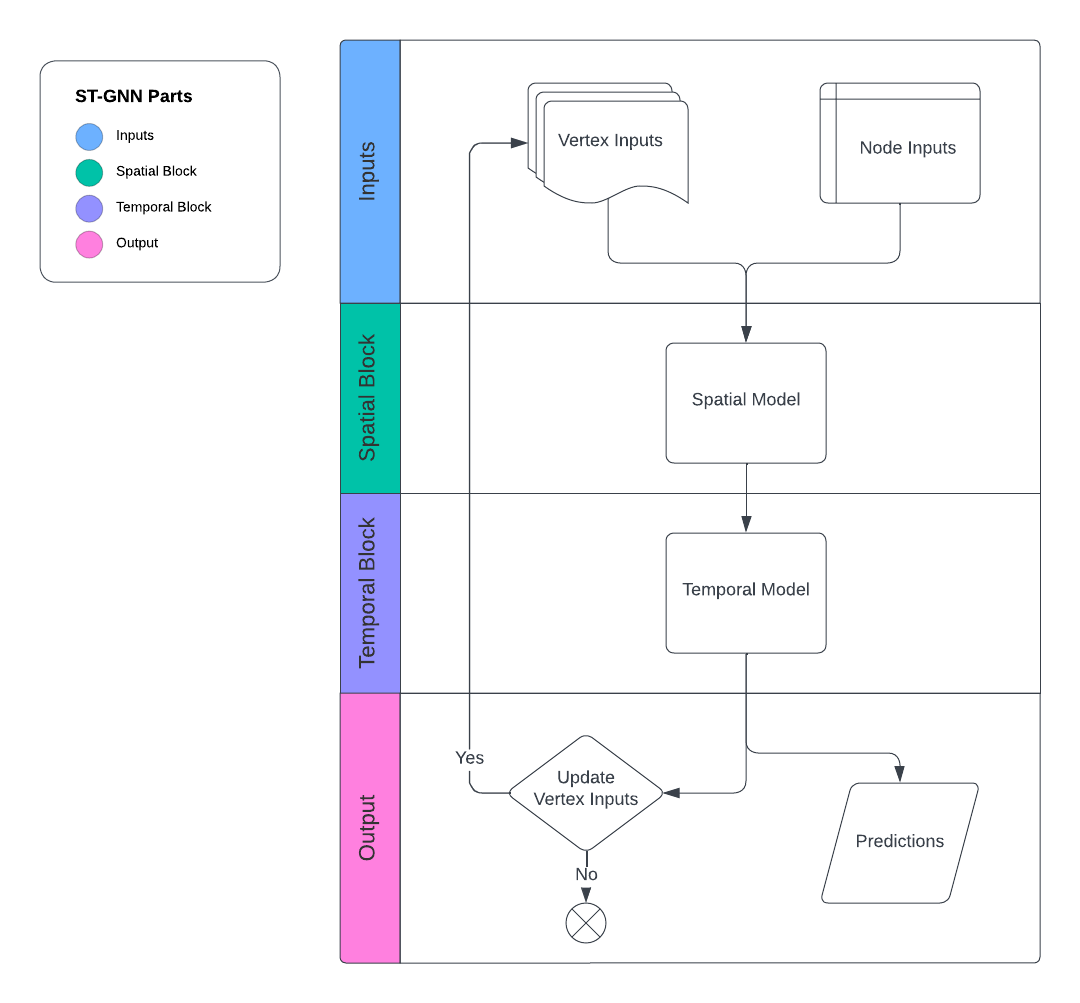
</div>

    Here one adjacency matrix is trained for the whole network. 

Friendly Introduction to Temporal Graph Neural Networks (and some Traffic Forecasting) by DeepFindr- https://www.youtube.com/watch?v=WEWq93tioC4&t=4s&ab_channel=DeepFindr

Note: This will begin with a fully connected graph between all nodes and trim nodes from that point or from a correlation matrix.
The current implementation doesn't have graph batching and will require larger compute power compared to other models in this benchmark system.
Even with batching, this is computationally expensive.

In [ ]:
from auto_hyperparameter_tuner import *
from torch.cuda.amp import GradScaler, autocast
# Disable cuDNN globally
torch.backends.cudnn.enabled = False
param_space = {
    "wandb_project": "Predicting Visual Stimulus",
    "wandb_api_key": "7c8d251196fd96d2a93bfb6ffd0005ac030ce42b",
    "num_epochs": 50,
    "lr": tune.uniform(.001,.0001),
    "temporal_hidden_dim": tune.randint(250, 850),
    "spatial_hidden_dim": 10,
    "edge_threshold":.2,
    "early_stop_patience": 3,
    "early_stop_delta": 0.01,
    "batch_size": 16,
    "graph_batch_size": 16,
    "temporal_layer_dimension":1,
    "spatial_out_features": 1,
    "mouse_number": 715093703,
    "timesteps": 3,
    "Architecture": 'Static_STGAT',
    "num_samples": 100,
    "accumulation_steps": 4,  # Gradient accumulation
    "graph_lr": .05,  # Adjust the range as needed
    "use_auto_corr_matrix": True,
    "file_path":"/nas/longleaf/home/rayrayc/Neuopixels/spike_trains_with_stimulus_session_715093703_3.pkl"
    }

trainer = ModelTrainer(param_space)
trainer.execute_tuning()

### 3.11) Transformer.

In [68]:
##Transformer testing 

from models.STTR import TransformerTemporalLayer
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

file_path = 'output/spike_trains_with_stimulus_session_732592105_10.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if np.issubdtype(data['frame'].dtype, np.object_):
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(data['frame'].values)
    y = torch.tensor(y_encoded, dtype=torch.long)
else:
    y = torch.tensor(data['frame'].values, dtype=torch.float32)
    
    
X = torch.tensor(data.drop(columns=['frame']).values, dtype=torch.float32)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_encoded = torch.tensor(y_encoded, dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, shuffle=False)

seq_len = 10
num_features = X_train.shape[1]
num_classes = len(np.unique(y_encoded))

def reshape_for_transformer(X, y, seq_len, num_features):
    num_samples = X.shape[0] // seq_len
    X = X[:num_samples*seq_len]
    X = X.view(num_samples, seq_len, num_features)

    y = y[:num_samples*seq_len]
    y = y.view(num_samples, seq_len)
    y = y[:, -1]  # Predicting a single value for each sequence
    return X, y

X_train, y_train = reshape_for_transformer(X_train, y_train, seq_len, num_features)
X_test, y_test = reshape_for_transformer(X_test, y_test, seq_len, num_features)

#Use tensor datsets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

original_input_dim = num_features #Currently 2717
transformer_input_dim = 2720 #Resize dimensions to allow for more attention heads
num_heads = 8 #input_dim must be divisible by num_heads, so has to be 1 for this input_dim
num_layers = 1
output_dim = num_classes

transformer_layer = TransformerTemporalLayer(
    original_input_dim=original_input_dim, 
    transformer_input_dim=transformer_input_dim,
    num_heads=num_heads, 
    num_layers=num_layers, 
    output_dim=output_dim)
transformer_layer = transformer_layer.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(transformer_layer.parameters(), lr=0.001)

num_epochs = 100

for epoch in range(num_epochs):
    transformer_layer.train()
    epoch_loss = 0
    for X_batch, y_batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = transformer_layer(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {epoch_loss / len(train_loader)}")

transformer_layer.eval()
with torch.no_grad():
    X_test = X_test.to(device)
    y_test = y_test.to(device)  

        
    outputs = transformer_layer(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).float().mean()
    print(f"Test Accuracy: {accuracy.item()}")

TypeError: TransformerTemporalLayer.__init__() got an unexpected keyword argument 'output_dim'

### 3.12) STTR (STGNN with Transformer temporal layer and GAT spatial layer)

In [75]:
from auto_hyperparameter_tuner import *
from torch.cuda.amp import GradScaler, autocast

file_path = '/proj/STOR/pipiras/Neuropixel/output/spike_trains_with_stimulus_session_715093703_10.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)

if np.issubdtype(data['frame'].dtype, np.object_):
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(data['frame'].values)
    num_classes = len(np.unique(y_encoded))
else:
    num_classes = len(np.unique(data['frame'].values))

param_space = {
    "wandb_project": "Predicting Visual Stimulus",
    "wandb_api_key": "7c8d251196fd96d2a93bfb6ffd0005ac030ce42b",
    "num_epochs": 50,
    "lr": tune.uniform(.001,.0001),
    "stgat_lr": 0.000815819,
    "spatial_hidden_dim": tune.randint(15,20),
    "temporal_hidden_dim": 760, #Not necessary for STTR
    "edge_threshold": 0.25,
    "early_stop_patience": 2,
    "early_stop_delta": 0.01,
    "batch_size": 16,
    "graph_batch_size": 16,
    "temporal_layer_dimension": 1,
    "spatial_out_features": 1,
    "mouse_number": 715093703,
    "timesteps": 10,
    "Architecture": 'ST-TR',
    "num_samples": 10,
    "accumulation_steps": tune.choice([1]), 
    "graph_lr": tune.loguniform(.01, .005),  
    #Transformer specific params
    "num_heads": tune.choice([4, 11, 22]), 
    "transformer_layers": 1, 
    "original_input_dim": 2065,
    "transformer_input_dim": 2068,
    "num_layers": 1,
    "output_dim": num_classes,
    "transformer_lr": 1.34311e-05,
    "use_auto_corr_matrix": False,
    "file_path":"/proj/STOR/pipiras/Neuropixel/output/spike_trains_with_stimulus_session_715093703_10.pkl"
    }

trainer = ModelTrainer(param_space)
trainer.execute_tuning()

AssertionError: HEBO must be installed! You can install HEBO with the command: `pip install 'HEBO>=0.2.0'`.This error may also be caused if HEBO dependencies have bad versions. Try updating HEBO first.

<a name="references"></a>
# References 
[Go to Outline](#outline)

##### Neuropixel References

- Data white paper: Allen Brain Observatory – Neuropixels Visual Coding, https://brainmapportal-live-4cc80a57cd6e400d854-f7fdcae.divio-media.net/filer_public/80/75/8075a100-ca64-429a-b39a-569121b612b2/neuropixels_visual_coding_-_white_paper_v10.pdf
- neuropixel data overview: Large-scale neural recordings with single neuron resolution using Neuropixels probes in human cortex,https://www.nature.com/articles/s41593-021-00997-0
- more neuropixel data overview: Fully integrated silicon probes for high-density recording of neural activity, https://www.nature.com/articles/nature24636
- synaptic transmission: https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/synaptic-transmission
- Uses same type of data(mouse visual cortex neurons w/ HD-MEA): https://www.nature.com/articles/s41586-019-1346-5
     - Shows similar images may invoke similar responses to save on personal computation.
- Study on same Dataset, uses 'Gain' model. https://elifesciences.org/articles/77907#s4

##### LSTM References

- Paper model overview: http://www.bioinf.jku.at/publications/older/2604.pdf 
- Another Paper: https://proceedings.neurips.cc/paper_files/paper/2014/file/a14ac55a4f27472c5d894ec1c3c743d2-Paper.pdf 
- Explanation - This guy worked at the stats dept at UNC I believe. https://www.youtube.com/watch?v=YCzL96nL7j0&ab_channel=StatQuestwithJoshStarmer 
- step by step: https://colah.github.io/posts/2015-08-Understanding-LSTMs/

##### Spatio-Temporal GNN References: 

- How attentive are graph attention networks? https://arxiv.org/pdf/2105.14491.pdf
- Adaptive weights for adjacency matrix in STGNN: https://www.ijcai.org/proceedings/2019/0264.pdf
- Discertation"Applications of Spatio-Temporal Graph Neural Network Models for Brain Connectivity Analysis": https://epub.uni-regensburg.de/53477/1/Dissertation_SimonWein.pdf
- Video reference: https://www.youtube.com/watch?v=RRMU8kJH60Q&t=250s&ab_channel=JacobHeglund
    - Code from video: https://drive.google.com/file/d/1WpBOZlDiDTTeeXN1gr31TMCWeh4qWW7W/view
- Attention Based Spatial-Temporal Graph Convolutional Networks(ASTGCN) - ***Paper referenced in video above: https://guoshnbjtu.github.io/pdfs/AAAI2019-GuoS.2690.pdf
- 2023 fmri application - https://conferences.miccai.org/2023/papers/269-Paper0418.html#:~:text=This%20paper%20proposed%20spatio%2Dtemporal,with%2082%25%20MCI%20classification%20accuracy.
- Map of STGNNs: https://www.researchgate.net/publication/369556812_Spatio-Temporal_Graph_Neural_Networks_for_Predictive_Learning_in_Urban_Computing_A_Survey
- STGNN for diagnosis of Depression (fMRI):https://onlinelibrary.wiley.com/doi/10.1002/hbm.25529
- TEMPORAL GRAPH NETWORKS FOR DEEP LEARNING ON DYNAMIC GRAPHS: https://arxiv.org/pdf/2006.10637.pdf
- Another Video Reference: https://www.youtube.com/watch?v=WEWq93tioC4&ab_channel=DeepFindr
- Older paper on Temporal Graph Networks: https://arxiv.org/pdf/2006.10637.pdf
- Pytorch and STGNNs: https://arxiv.org/pdf/2104.07788.pdf
- Survey of STGNNs: https://arxiv.org/abs/2301.10569

- STGNN predicting resting states in fMRI: https://www.sciencedirect.com/science/article/pii/S1361841522001189
- Spatio-Temporal Graph Convolution for Resting-State fMRI Analysis https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7700758/
- STGNN for flood forecasting: https://www.nature.com/articles/s41598-023-32548-x
- Other types of predictive Graph Networks - https://jonathan-hui.medium.com/graph-neural-networks-gnn-gae-stgnn-1ac0b5c99550
- "Graph neural networks: A review of methods and applications":https://www.sciencedirect.com/science/article/pii/S2666651021000012

##### Learnable Adjacency Matrix

- Overview of GAT: https://arxiv.org/abs/1710.10903
- Adaptive GCNN: https://arxiv.org/abs/1801.03226

##### Functional Connectomic References

- Functional brain networks reflect spatial and temporal autocorrelation(fMRI study): https://www.nature.com/articles/s41593-023-01299-3
- Using GNN to show changes in functional connectivity : https://www.frontiersin.org/articles/10.3389/fninf.2022.1032538/full
            - The above paper shows that showing the funcitonal connectivity in a GNN using graphsage is useful for predicting drug changes in functional connectivit.
            - They used umap in python to show groupings related to change in states.
- A graph neural network framework for causal inference in brain networks(fMRI study): https://www.nature.com/articles/s41598-021-87411-8
- Distinct brain-wide presynaptic networks underlie the functional identity of individual cortical neurons : https://www.biorxiv.org/content/10.1101/2023.05.25.542329v1
- Overview of other models used to find Functional Connectomics in the mouse visual cortex: https://www.biorxiv.org/content/10.1101/662189v2.full
- Older paper on overview on identifying Functional Connectivity in single neurons:https://direct.mit.edu/neco/article-abstract/21/2/450/8696/Identifying-Functional-Connectivity-in-Large-Scale?redirectedFrom=fulltext
- Learning-Induced Enduring Changes in Functional Connectivity among Prefrontal Cortical Neurons: https://www.jneurosci.org/content/27/4/909

##### Possible Future models
- Graph LSTMs
- Generating model for GNN: Discovering Symbolic Models from Deep Learning with Inductive Biases - https://www.youtube.com/watch?v=LMb5tvW-UoQ&ab_channel=YannicKilcher 
        -paper: https://arxiv.org/abs/2006.11287 
        -Code: https://github.com/MilesCranmer/symbolic_deep_learning
- Method to scale STGNNs to compute more timesteps: https://arxiv.org/abs/2209.06520
- Physics Informed Neural Net(PINN): https://arxiv.org/abs/2201.05624 
        - Similar to Discovering Symbolic Models from Deep Learning with Inductive Biases: https://www.youtube.com/watch?v=LMb5tvW-UoQ&t=1217s&ab_channel=YannicKilcher 
        - Converting NNs to symbolic models "https://www.youtube.com/watch?v=wmQIcTOzH0k&ab_channel=MilesCranmer"